## Final Project: Applied Deep Learning
### Project name: Sudoku
### Author: Qichun Yu

## Table of Contents
1. [Introduction](#Abstract)  
    1.1. [Abstract](#Abstract)  
    1.2. [Use Case](#Use-Case)  
    1.3. [Load and Read Data](#Load-and-Read-Data)  
    1.4. [Data Cleaning](#Data-Cleaning)
2. [Preprocessing](#Preprocessing)  
    2.1. [Normalization](#Normalization)  
    2.2. [Data Splitting](#Data-Splitting)  
3. [Convolutional Neural Networks (CNNs)](#Convolutional-Neural-Networks-(CNNs))  
    3.1. [CNN Model 1](#CNN-Model-1)  
    3.2. [CNN Model 2](#CNN-Model-2)   
    3.3. [CNN Model 3](#CNN-Model-3)  
    3.4. [CNN Model 4](#CNN-Model-4)  
    3.5. [CNN Model 5](#CNN-Model-5)  
    3.6. [CNN Model 6](#CNN-Model-6)  
    3.7. [CNN Model 7](#CNN-Model-7)  
    3.8. [CNN Model 8](#CNN-Model-8)  
    3.9. [CNN Model 9](#CNN-Model-9)  
    3.10. [CNN Model 10](#CNN-Model-10)  
    3.11. [CNN Model 11](#CNN-Model-11)  
4. [Recurrent Neural Networks (RNN)](#Recurrent-Neural-Networks-(RNN))  
    4.1. [RNN Model 1](#RNN-Model-1)    
    4.2. [RNN Model 2](#RNN-Model-2)  
5. [Long Short-Term Memory (LSTM)](#Long-Short-Term-Memory-(LSTM))   
6. [Discussion](#Discussion)
7. [Conclusion](#Conclusion)

### Abstract

Sudoku is a number puzzle game that requires you to fill in digits 1 to 9. The game requires digits 1 to 9 to appear exactly once in each row, column and each of the nine 3x3 subgrids. The project experiment with different neural networks such as CNN, RNN, and LSTM. The data have been divided by 9 and subtracted by 0.5 to achieve zero mean-centred data. The CNN model that includes 9 convolution layers with 512 kernels works best with 95% of training accuracy. The study found that an increase in the number of epochs, number of layers, and number of neurons per layer can help improve the accuracy of the neural network model. Moreover, the dropout layer and maxpooling can help prevent overfitting. Adding strides of 3 x 3 is useful but requires large computing power. The main objective of this project is to build a deep learning model for a mobile app company that can analyze the grid of Sudoku to be filled, solve the Sudoku problem, and fill the grid. The convolution neural networks (CNN) is good at extracting features from the dataset and can be used to solve a sudoku game successfully. 

### Use Case
A mobile app company is building a classical Sudoku game. The development team is working on building a deep learning model which can analyze the grid of sudoku puzzles to be filled, solve the sudoku puzzles problem, and then automatic fill the grid in the end. The dataset includes 1 million Sudoku quizs with solution. This deep learning model will be part of a larger code as the backend of the Sudoku game application. 

### Citation

Kyubyong Park.(September, 2022). 1 million Sudoku games. Retrieved from https://www.kaggle.com/datasets/bryanpark/sudoku.

### Environment
Operating system: Windows Server 2019 atacenter, 64-bit<br>
GPU: Tesla V100-PCIE-16GB

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import disarray

C:\Miniconda\envs\DL\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Miniconda\envs\DL\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Miniconda\envs\DL\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# import libraries for neural network
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv1D, Conv2D, BatchNormalization, LayerNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.layers import LSTM

### Load and Read Data

In [3]:
df = pd.read_csv("sudoku.csv")

In [4]:
df.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


In [5]:
df.shape

(1000000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   quizzes    1000000 non-null  object
 1   solutions  1000000 non-null  object
dtypes: object(2)
memory usage: 15.3+ MB


There are 1,000,000 rows with 2 columns (quizzes and solutions). The datatype for each column is an object. They are both relevant to the use case and will be used to train in the model. 

In [7]:
df.describe()

,quizzes,solutions
count,1000000,1000000
unique,1000000,1000000
top,0160509002050000873900040024207000066075023005...,7983641251245897366532718498429135673617582945...
freq,1,1


In [8]:
df.isnull().values.any()

False

There are 1,000,000 unique quizzes and solutions. There is not null value in the dataset. 

In [9]:
type(df['quizzes'][0])

str

In [10]:
len(df['quizzes'][0])

81

In [11]:
type(df['solutions'][0])

str

In [12]:
len(df['solutions'][0])

81

The value of the quizzes and the solutions columns are in the form of strings with a length of 81. 

We can use reshape function to represent the puzzle as a 9X9 Python NumPy array. In the quizzes column, '0' is represented as the blank. Let's use reshape to print out the first row of the quiz and solution: 

In [13]:
print("Quiz:\n",np.array(list(map(int,list(df['quizzes'][0])))).reshape(9,9))

Quiz:
 [[0 0 4 3 0 0 2 0 9]
 [0 0 5 0 0 9 0 0 1]
 [0 7 0 0 6 0 0 4 3]
 [0 0 6 0 0 2 0 8 7]
 [1 9 0 0 0 7 4 0 0]
 [0 5 0 0 8 3 0 0 0]
 [6 0 0 0 0 0 1 0 5]
 [0 0 3 5 0 8 6 9 0]
 [0 4 2 9 1 0 3 0 0]]


In [14]:
print("Solution:\n",np.array(list(map(int,list(df['solutions'][0])))).reshape(9,9))

Solution:
 [[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


Let's build a display function to display the puzzle board. 

In [15]:
def display(board):
    for i in range(9):
        if i in [3, 6]:
            print('------+-------+------')
        for j in range(9):
            if j in [3, 6]:
                print('| ', end='')
            print(board[i * 9 + j] + ' ', end='')
        print()


display(df['quizzes'][0])

0 0 4 | 3 0 0 | 2 0 9 
0 0 5 | 0 0 9 | 0 0 1 
0 7 0 | 0 6 0 | 0 4 3 
------+-------+------
0 0 6 | 0 0 2 | 0 8 7 
1 9 0 | 0 0 7 | 4 0 0 
0 5 0 | 0 8 3 | 0 0 0 
------+-------+------
6 0 0 | 0 0 0 | 1 0 5 
0 0 3 | 5 0 8 | 6 9 0 
0 4 2 | 9 1 0 | 3 0 0 


In [16]:
display(df['solutions'][0])

8 6 4 | 3 7 1 | 2 5 9 
3 2 5 | 8 4 9 | 7 6 1 
9 7 1 | 2 6 5 | 8 4 3 
------+-------+------
4 3 6 | 1 9 2 | 5 8 7 
1 9 8 | 6 5 7 | 4 3 2 
2 5 7 | 4 8 3 | 9 1 6 
------+-------+------
6 8 9 | 7 3 4 | 1 2 5 
7 1 3 | 5 2 8 | 6 9 4 
5 4 2 | 9 1 6 | 3 7 8 


Sudoku is a logic-based game. It relies on the number of clues available on the board. The position of the available digits that are available on the board also matters to solve the puzzle. From the first game and solution above, the solution is replacing the number '0' with the correct number that fit the sudoku requirement. Each row, each column, and each 3x3 sub-square must contain 1 - 9 without repetition. Therefore, there is a sequence to solve the puzzle. The player must analyze the position of each available number on the board first to decide the next move of the game. 

Let's discover the number of blank squares in each quiz:

In [17]:
list(df['quizzes'][0]).count('0')

46

There are 46 blank squares in the first quiz. 

In [18]:
number_of_blanks=[]
for i in range(df.shape[0]):
    number_of_blanks.append(list(df['quizzes'][i]).count('0'))
number_of_blanks[:10]

[46, 47, 47, 48, 49, 48, 47, 46, 46, 48]

In [19]:
df['number_of_blanks']=number_of_blanks

In [20]:
df.head()

,quizzes,solutions,number_of_blanks
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...,46
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...,47
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...,47
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...,48
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...,49


In [21]:
df['number_of_blanks'].value_counts()

47    455004
48    263913
46    198940
49     61122
45     12662
50      7748
51       526
44        57
52        28
Name: number_of_blanks, dtype: int64

From the data above, we can see the number of blanks is between 44 to 52. The percentage of blanks is between 54%(47/81) to 64%(52/81).     The number of given numbers is between 29 (81-52) to 37 (81-47). According to ResearchGate, the number of clues between 28 - 31 is considered to be difficult, the number of clues between 32 - 35 is considered to be medium difficulty level, and the number of clues between 36 - 46 is considered to be easy. Therefore, most of the Sudoku quizzes from this dataset are considered to be medium.  (https://www.researchgate.net/figure/Number-of-clues-for-each-difficulty-level_tbl1_259525699) 

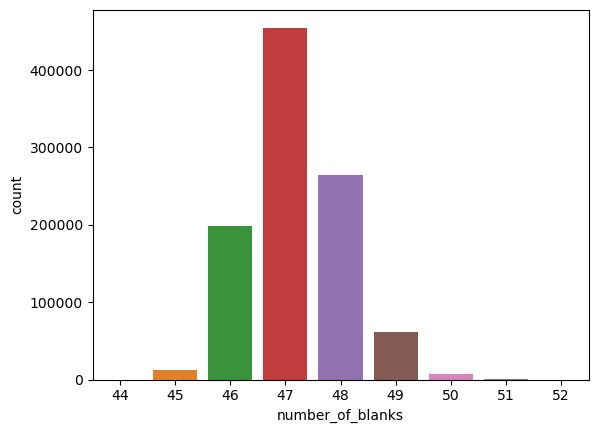

In [22]:
sns.countplot(x=df['number_of_blanks'])

From the plot above, most of the puzzle has 47 blank grids. 

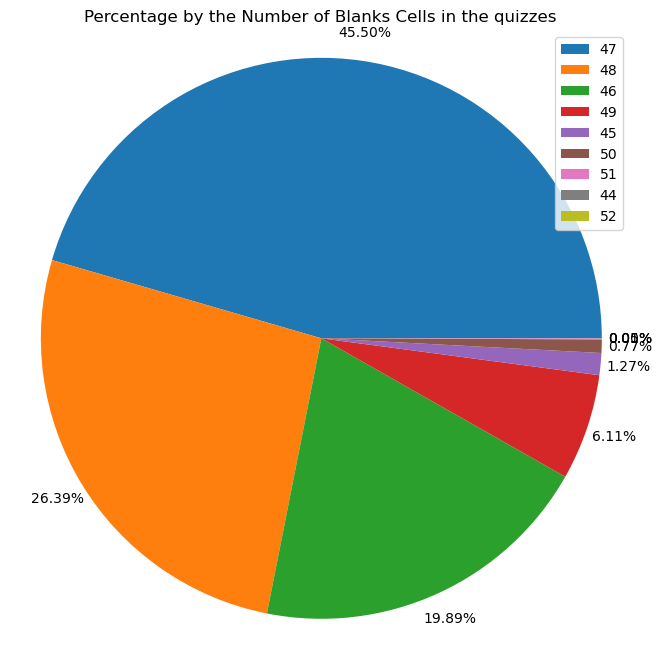

In [23]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(df['number_of_blanks'].value_counts(), autopct='%1.2f%%', pctdistance=1.1)
ax1.legend(df['number_of_blanks'].value_counts().index)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage by the Number of Blanks Cells in the quizzes")
plt.show()

From the pie chart above, we can see about 45.5% of quizzes with 47 blank cells. The medium difficulty level (46-49 blanks) is about 98% (45.50%+26.39%+19.89%+6.11%). 

Before the model building, it is important to verify that all the solutions are valid sudoku solutions. A solution is valid must be validated with the following rules: 
<ul>
<li>Each row must contain 1 - 9 without repetition</li>
<li>Each column must contain 1 - 9 without repetition</li>
<li>Each of the nine 3 x 3 sub-squares must contain 1 - 9 without repetition</li>
</ul>
Sudoku_check is a python code to validate a sudoku solution, which was built by Suyash. The code has been modified to return True when is valid and False when is invalid. The original code can be found here: https://www.codespeedy.com/check-for-a-valid-sudoku-in-python. 

In [24]:
import sudoku_check as sudoku_check
grid_0=np.array(list(map(int,list(df['solutions'][0])))).reshape(9,9)
sudoku_check.valid_board(grid_0)

True

In [25]:
df['is_valid']=df.apply(lambda x: sudoku_check.valid_board(np.array(list(map(int,list(x['solutions'])))).reshape(9,9)), axis=1)

In [26]:
df.head()

,quizzes,solutions,number_of_blanks,is_valid
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...,46,True
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...,47,True
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...,47,True
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...,48,True
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...,49,True


In [27]:
df['is_valid'].value_counts()

True    1000000
Name: is_valid, dtype: int64

All the solutions are vaild!

### Data Cleaning

Because we don't need the 'number_of_blanks' or 'is_valid' for deep learning model training; therefore, we may drop these two columns after the analysis. 

In [28]:
data = df.drop(['number_of_blanks','is_valid'], axis=1)
data.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


### Preprocessing

[Return to top](#Final-Project:-Applied-Deep-Learning)

Before passing the data as inputs to the neural net model, use reshape function from NumPy to expand the dimensions (N, 9, 9, -1). 

In [29]:
X = np.array(df.quizzes.map(lambda x: list(map(int, x))).to_list()).reshape(-1,9,9,1)
Y = np.array(df.solutions.map(lambda x: list(map(int, x))).to_list()).reshape(-1,9,9)

In [30]:
X.shape

(1000000, 9, 9, 1)

#### Normalization

Normalize the data by dividing it by 9 and subtracting it by 0.5 to achieve zero mean-centred data. Because the neural networks usually generate a better performance with zero-centred normalized data. 

In [31]:
# print the original first sudoku quiz
print(X[0].reshape(9,9))

[[0 0 4 3 0 0 2 0 9]
 [0 0 5 0 0 9 0 0 1]
 [0 7 0 0 6 0 0 4 3]
 [0 0 6 0 0 2 0 8 7]
 [1 9 0 0 0 7 4 0 0]
 [0 5 0 0 8 3 0 0 0]
 [6 0 0 0 0 0 1 0 5]
 [0 0 3 5 0 8 6 9 0]
 [0 4 2 9 1 0 3 0 0]]


In [32]:
X = X / 9

In [33]:
# print the first sudoku quiz to verify
print(X[0].reshape(9,9))

[[0.         0.         0.44444444 0.33333333 0.         0.
  0.22222222 0.         1.        ]
 [0.         0.         0.55555556 0.         0.         1.
  0.         0.         0.11111111]
 [0.         0.77777778 0.         0.         0.66666667 0.
  0.         0.44444444 0.33333333]
 [0.         0.         0.66666667 0.         0.         0.22222222
  0.         0.88888889 0.77777778]
 [0.11111111 1.         0.         0.         0.         0.77777778
  0.44444444 0.         0.        ]
 [0.         0.55555556 0.         0.         0.88888889 0.33333333
  0.         0.         0.        ]
 [0.66666667 0.         0.         0.         0.         0.
  0.11111111 0.         0.55555556]
 [0.         0.         0.33333333 0.55555556 0.         0.88888889
  0.66666667 1.         0.        ]
 [0.         0.44444444 0.22222222 1.         0.11111111 0.
  0.33333333 0.         0.        ]]


In [34]:
X -= .5

In [35]:
# print the first sudoku quiz to verify
print(X[0].reshape(9,9))

[[-0.5        -0.5        -0.05555556 -0.16666667 -0.5        -0.5
  -0.27777778 -0.5         0.5       ]
 [-0.5        -0.5         0.05555556 -0.5        -0.5         0.5
  -0.5        -0.5        -0.38888889]
 [-0.5         0.27777778 -0.5        -0.5         0.16666667 -0.5
  -0.5        -0.05555556 -0.16666667]
 [-0.5        -0.5         0.16666667 -0.5        -0.5        -0.27777778
  -0.5         0.38888889  0.27777778]
 [-0.38888889  0.5        -0.5        -0.5        -0.5         0.27777778
  -0.05555556 -0.5        -0.5       ]
 [-0.5         0.05555556 -0.5        -0.5         0.38888889 -0.16666667
  -0.5        -0.5        -0.5       ]
 [ 0.16666667 -0.5        -0.5        -0.5        -0.5        -0.5
  -0.38888889 -0.5         0.05555556]
 [-0.5        -0.5        -0.16666667  0.05555556 -0.5         0.38888889
   0.16666667  0.5        -0.5       ]
 [-0.5        -0.05555556 -0.27777778  0.5        -0.38888889 -0.5
  -0.16666667 -0.5        -0.5       ]]


Subtract 1 from the sudoku solution to reassign labels 0 ~ 8 to corresponding digits 1 ~ 9. 

In [36]:
# print the original first sudoku solution
print(Y[0].reshape(9,9))

[[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


In [37]:
Y -= 1

In [38]:
# print the first sudoku solution to verify
print(Y[0].reshape(9,9))

[[7 5 3 2 6 0 1 4 8]
 [2 1 4 7 3 8 6 5 0]
 [8 6 0 1 5 4 7 3 2]
 [3 2 5 0 8 1 4 7 6]
 [0 8 7 5 4 6 3 2 1]
 [1 4 6 3 7 2 8 0 5]
 [5 7 8 6 2 3 0 1 4]
 [6 0 2 4 1 7 5 8 3]
 [4 3 1 8 0 5 2 6 7]]


#### Data Splitting

Splitting data with a ratio of 80/20. The first 800,000 data (80%) as the training set and the last 200,000 data (20%) as the testing set. 

In [39]:
# set training split equal to 0.8
training_split = 0.8

splitidx = int(len(data) * training_split)
# first 80% of data as training set, last 20% of data as testing set
x_train, x_test = X[:splitidx], X[splitidx:]
y_train, y_test = Y[:splitidx], Y[splitidx:]

In [40]:
# valify the size of training set
print(x_train.shape)

(800000, 9, 9, 1)


In [41]:
# valify the size of testing set
print(x_test.shape)

(200000, 9, 9, 1)


### Neural Networks Models

Visualizing the Loss & Accuracy Plot of Training & Validation data can help us to know if a model has overfitting or underfitting. Matplotlib plots can help us visualize the history of network learning (accuracy & loss). 

<ul>
    <li>If loss falls on the training set and increases on the testing set, the network model has overfitted.</li>
    <li>Training loss is much lower than validation loss, the network is overfitting.</li>
    <li>If the training loss is too high, it indicates the neural network model could not learn the training data and the network is underfitting.</li>
</ul>

In [42]:
# define a plot function to plot the loss and accuracy of train and test
def loss_acc_plot(history):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(12,6)

    ax[0].plot(history.history['loss'], label='train loss')
    ax[0].plot(history.history['val_loss'], label='val loss')
    ax[0].set_title('Training and Validation Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend(['train', 'val'], loc='upper right')

    ax[1].plot(history.history['accuracy'], label='accuracy')
    ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
    ax[1].set_title('Training and Validation Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend(['train', 'val'], loc='upper right')

    plt.show()

The models use **Adam Optimizer** with a learning rate of **0.001**, the optimizer is save to a variable called optimizer. 

In [43]:
# using an Adam optimizer with a learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(0.001)

Because we are training a **multiclass** classifier, predicting digits 1~9 (9 classes). Since we are not using one-hot encoded, the loss function that is using is **sparse_categorical_crossentropy**. For multi-class classification, **Softmax** will be the activation function for the last layer, which outputs multiple numerical numbers ranging from 0 to 8 (9 classes)corresponding to the probability of each class. 

### Convolutional Neural Networks (CNNs)

[Return to top](#Final-Project:-Applied-Deep-Learning)

Convolutional neural networks (CNN) are good at extracting local features from the image and are commonly used to analyze visual imagery. If we treat each number as its own feature of the puzzle, so there are 81 different features available. CNN is good at extracting features, which could generate good performance.

**Hyperparameter Tuning**:<br>

<ul>
    <li><strong>Number of epochs:</strong> Increasing number of epochs can help improve the accuracy and lowers the loss; however, a high number of epochs may result in an overfitting model.</li>
    <li><strong>Number of layers:</strong> Increasing number of layers help increases the accuracy; however, a high number of layers may result in an overfitting model.</li>
    <li><strong>Number of neurons per layer:</strong> Increasing number of neurons can help imporve the accuracy.</li>
</ul>


#### CNN Model 1

Let's start with a simple CNN model. 
<ul>
    <li>The model start with a <strong>Conv2D()</strong>  class, which is a 2D convolution layer. The first layer is a convolution layer with 64 kernels that are (3,3) in dimension. The padding is 'same' so that a padding gets the same output dimension as the input. The ReLU is used as the activation function. The input are batches of arrays of shape (9,9).</li>
    <li><strong>Batch normalization</strong> is a method to normalize the inputs of each layer. It can help speed up and stabilize neural networks.</li>
    <li>Adding a convolution layer with 64 kernels of shape (3 x 3), a batch normalization layer and a convolution layer with 128 kernels of shape (1 x 1).</li>
    <li>After that, a <strong>Flatten</strong> layer help to comprise the (9,9, 128) to 10,368 (9x9x128) input nodes.</li>
    <li><strong>Dense</strong> is a regular neural network layer that performs a dot product operation. The matrix multiplication is represented by the dot(X, W) + B, where X is the input to the layer, W is the weight, and B is the bias. Using 729 (81x9) in the dense layer means performing matrix multiplication to result in an output matrix with a desired last dimension to be 729. </li>
    <li><strong>LayerNormalization</strong> is used to normalize a layer.</li>
    <li>Using <strong>Reshape</strong> layer to (9,9,9) so that the last layer has 9 neurons corresponding to the 9 classes(0~8) with a <strong>softmax activation function</strong>. </li>
</ul>

In [44]:
# Function for the cnn model function
def cnn_model_func1():
    # Instantiate model
    model = tf.keras.Sequential()
    # add a convolution layer with 64 kernels of shape (3 x 3)
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    # normalize the kernel values for Convolution Layers
    model.add(BatchNormalization())
    # add a convolution layer with 64 kernels of shape (3 x 3)
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    # normalize the kernel values for Convolution Layers
    model.add(BatchNormalization())
    # add a convolution layer with 128 kernels of shape (1 x 1)
    model.add(Conv2D(128, kernel_size=(1,1), activation='relu', padding='same'))
    # comprises the (9,9, 128) to a 10,368 (9*9*128) input nodes
    model.add(Flatten())
    # Add a dense layer to perform matrix multiplication to result in an output matix with 729(81*9)
    model.add(Dense(81*9))
    # normalize the dense layer above
    model.add(LayerNormalization(axis=-1))
    # the last layer has 9 neurons corresponding to the 9 classes with a softmax activation function
    model.add(Reshape((9, 9, 9)))
    # using softmax as activation function for multiclass
    model.add(Activation('softmax'))
    
    return model

In [45]:
# Initialise the cnn model
cnn_model1 = cnn_model_func1()
# print summary of the cnn model
cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 64)          640       
                                                                 
 batch_normalization (BatchN  (None, 9, 9, 64)         256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 batch_normalization_1 (Batc  (None, 9, 9, 64)         256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         8320      
                                                                 
 flatten (Flatten)           (None, 10368)             0

The model compile with the **sparse_categorical_crossentropy** loss function which does not require passing one-hot vectors as output. 
Training with a **batch size of 32 and epochs of 5**. Batch size is the number of samples processed before the network model is updated. Large batch size may result in overfitting so the model starts with 32. 
Let's train it with five epochs to see how it performs. 

In [46]:
# Train the model
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history1 = cnn_model1.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
25000/25000 [==============================] - 160s 4ms/step - loss: 0.4753 - accuracy: 0.7985 - val_loss: 0.3760 - val_accuracy: 0.8243
Epoch 2/5
25000/25000 [==============================] - 96s 4ms/step - loss: 0.3631 - accuracy: 0.8307 - val_loss: 0.3601 - val_accuracy: 0.8312
Epoch 3/5
25000/25000 [==============================] - 97s 4ms/step - loss: 0.3475 - accuracy: 0.8391 - val_loss: 0.3541 - val_accuracy: 0.8340
Epoch 4/5
25000/25000 [==============================] - 97s 4ms/step - loss: 0.3381 - accuracy: 0.8444 - val_loss: 0.3519 - val_accuracy: 0.8351
Epoch 5/5
25000/25000 [==============================] - 96s 4ms/step - loss: 0.3314 - accuracy: 0.8483 - val_loss: 0.3509 - val_accuracy: 0.8358


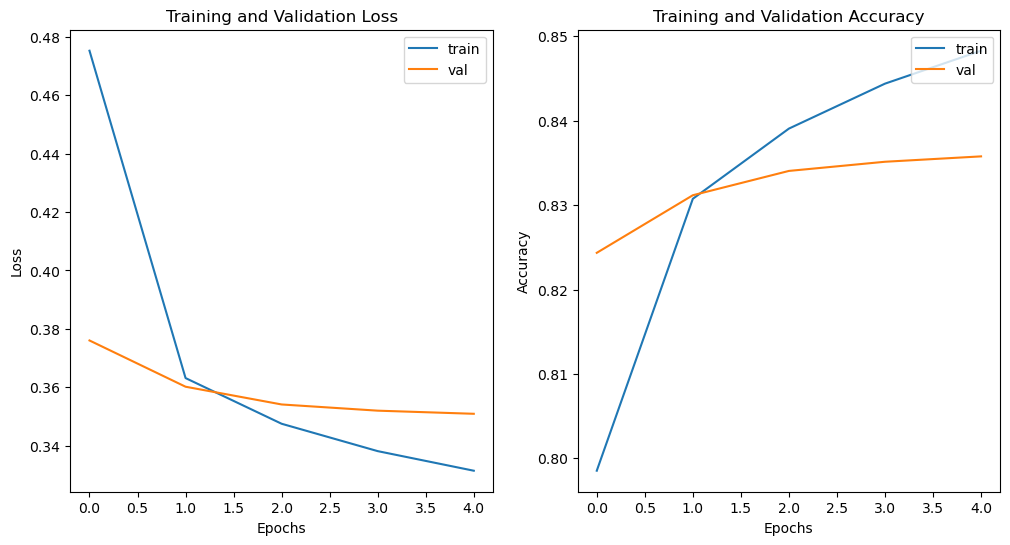

In [47]:
loss_acc_plot(history1)

From the above training, it looks like the training loss decreasing but validation loss is increasing. The model is overfitting. 

In [48]:
training_accuracy1 = history1.history['accuracy'][-1]
training_loss1 = history1.history['loss'][-1]
print(f"Training Loss: {training_loss1:.4f}, Training Accuracy: {training_accuracy1:.4f}")

Training Loss: 0.3314, Training Accuracy: 0.8483


In [49]:
val_loss1, val_accuracy1 = cnn_model1.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss1:.4f}, Validation Accuracy: {val_accuracy1:.4f}")

6250/6250 [==============================] - 14s 2ms/step - loss: 0.3509 - accuracy: 0.8358
Done!
Valiation Loss: 0.3509, Validation Accuracy: 0.8358


The training accuracy of 0.8483 is not bad. But let's test the model to see if it can solve a real sudoku game or not. 

In [50]:
train_pred_1 = cnn_model1.predict(x_train[0].reshape((9, 9)).reshape(1, 9, 9, 1)).argmax(-1)+1
train_pred_1

array([[[8, 6, 4, 3, 7, 5, 2, 6, 9],
        [3, 3, 5, 4, 4, 9, 7, 7, 1],
        [9, 7, 1, 2, 6, 5, 5, 4, 3],
        [4, 3, 6, 1, 5, 2, 9, 8, 7],
        [1, 9, 8, 6, 5, 7, 4, 3, 6],
        [4, 5, 7, 6, 8, 3, 9, 1, 6],
        [6, 8, 9, 7, 3, 4, 1, 2, 5],
        [7, 1, 3, 5, 2, 8, 6, 9, 4],
        [5, 4, 2, 9, 1, 6, 3, 7, 8]]], dtype=int64)

In [51]:
train_real_1 = y_train[0]+1
train_real_1

array([[8, 6, 4, 3, 7, 1, 2, 5, 9],
       [3, 2, 5, 8, 4, 9, 7, 6, 1],
       [9, 7, 1, 2, 6, 5, 8, 4, 3],
       [4, 3, 6, 1, 9, 2, 5, 8, 7],
       [1, 9, 8, 6, 5, 7, 4, 3, 2],
       [2, 5, 7, 4, 8, 3, 9, 1, 6],
       [6, 8, 9, 7, 3, 4, 1, 2, 5],
       [7, 1, 3, 5, 2, 8, 6, 9, 4],
       [5, 4, 2, 9, 1, 6, 3, 7, 8]])

In [52]:
train_pred_1 - train_real_1

array([[[ 0,  0,  0,  0,  0,  4,  0,  1,  0],
        [ 0,  1,  0, -4,  0,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  0, -3,  0,  0],
        [ 0,  0,  0,  0, -4,  0,  4,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  4],
        [ 2,  0,  0,  2,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0]]], dtype=int64)

From above, we can see the model is making some bad prediction with the first training quiz. 

In [53]:
test_pred_1 = cnn_model1.predict(x_test[1].reshape((9, 9)).reshape(1, 9, 9, 1)).argmax(-1)+1
test_pred_1

array([[[3, 1, 6, 4, 9, 2, 7, 6, 7],
        [7, 9, 7, 5, 1, 8, 2, 4, 3],
        [2, 5, 4, 3, 7, 6, 2, 8, 1],
        [8, 2, 9, 6, 4, 1, 5, 3, 7],
        [6, 7, 3, 2, 8, 5, 4, 9, 4],
        [5, 4, 9, 7, 3, 9, 6, 2, 8],
        [4, 3, 2, 8, 5, 7, 9, 1, 6],
        [1, 6, 6, 6, 6, 3, 8, 7, 4],
        [9, 8, 6, 1, 6, 7, 8, 5, 2]]], dtype=int64)

In [54]:
test_real_1 = y_test[1]+1
test_real_1

array([[3, 1, 8, 4, 9, 2, 7, 6, 5],
       [7, 9, 6, 5, 1, 8, 2, 4, 3],
       [2, 5, 4, 3, 7, 6, 1, 8, 9],
       [8, 2, 9, 6, 4, 1, 5, 3, 7],
       [6, 7, 3, 2, 8, 5, 4, 9, 1],
       [5, 4, 1, 7, 3, 9, 6, 2, 8],
       [4, 3, 2, 8, 5, 7, 9, 1, 6],
       [1, 6, 5, 9, 2, 3, 8, 7, 4],
       [9, 8, 7, 1, 6, 4, 3, 5, 2]])

In [55]:
test_pred_1 - test_real_1

array([[[ 0,  0, -2,  0,  0,  0,  0,  0,  2],
        [ 0,  0,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  0, -8],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  3],
        [ 0,  0,  8,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1, -3,  4,  0,  0,  0,  0],
        [ 0,  0, -1,  0,  0,  3,  5,  0,  0]]], dtype=int64)

We can see it is making bad prediction on some number on the second testing quiz. 

CNN Model 1 only achieved an accuracy of 84% on the training set and is not ideal fro solving a sudoku game since it is making bad prediction on the real sudoku game. Let's see if we can create a better model for solving sudoku game.

#### CNN Model 2

[Return to top](#Final-Project:-Applied-Deep-Learning)

Let's try with another simple CNN model. 

<ul>
    <li>The model start with a <strong>Conv2D()</strong>  class, which is a 2D convolution layer. The first layer is a convolution layer with 64 kernels that are (3,3) in dimension. The padding is 'same' so that a padding gets the same output dimension as the input. The ReLU is used as the activation function. </li>
    <li>After that, a <strong>Flatten</strong> layer help to comprise the (9,9, 64) to 5,184 (9x9x64) input nodes.</li>
    <li>Add a <strong>Dense</strong> layer that performs a dot product operation. Using 2187 (81x9x3) in the dense layer means performing matrix multiplication to result in an output matrix with a desired last dimension to be 2187. </li>
    <li>Add a <strong>Dense</strong> layer that performs a dot product operation. Using 1458 (81x9x2) in the dense layer means performing matrix multiplication to result in an output matrix with a desired last dimension to be 1458. </li>
    <li>A <strong>Dropout</strong> of 20% is added to the hidden layer. A dropout method randomly deactivated a certain number of neurons during the training process. Adding a dropout of 20% means 20% of the neurons in that layer will be randomly deactivated during training.</li>
    <li>Add a <strong>Dense</strong> layer that performs a dot product operation. Using 729 (81x9) in the dense layer means performing matrix multiplication to result in an output matrix with a desired last dimension to be 729. </li>
    <li><strong>LayerNormalization</strong> is used to normalize a layer.</li>
    <li>Using <strong>Reshape</strong> layer to (9,9,9) so that the last layer has 9 neurons corresponding to the 9 classes(0~8) with a <strong>softmax activation function</strong>. </li>
</ul>

In [64]:
def cnn_model_func2():
    # Instantiate model
    model = tf.keras.Sequential()
    # add a convolutiion layer with 64 kernels of shape (3 x 3)
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    # comprise the (9 , 9 , 64) to 5184 input nodes
    model.add(Flatten())
    # add a dense layer (81 * 9 *3)
    model.add(Dense(81*9*3, activation='relu'))
     # add a dense layer (81 * 9 *2)
    model.add(Dense(81*9*2, activation='relu'))
    # add a dropout layer of 20% to prevent overfitting
    model.add(Dropout(.20))
     # add a dense layer (81 * 9 )
    model.add(Dense(81*9, activation='relu'))
    # normalize the dense layer 
    model.add(LayerNormalization(axis=-1))
    # reshape and using softmax as activation function for multiclass
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [65]:
# Initialise the cnn model
cnn_model2 = cnn_model_func2()
# print summary of the cnn model
cnn_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 9, 9, 64)          640       
                                                                 
 flatten_3 (Flatten)         (None, 5184)              0         
                                                                 
 dense_7 (Dense)             (None, 2187)              11339595  
                                                                 
 dense_8 (Dense)             (None, 1458)              3190104   
                                                                 
 dropout_4 (Dropout)         (None, 1458)              0         
                                                                 
 dense_9 (Dense)             (None, 729)               1063611   
                                                                 
 layer_normalization_3 (Laye  (None, 729)             

In [66]:
# Train the model
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history2 = cnn_model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
25000/25000 [==============================] - 90s 4ms/step - loss: 2.1621 - accuracy: 0.1277 - val_loss: 2.1413 - val_accuracy: 0.1374
Epoch 2/100
25000/25000 [==============================] - 89s 4ms/step - loss: 2.1354 - accuracy: 0.1399 - val_loss: 2.1266 - val_accuracy: 0.1439
Epoch 3/100
25000/25000 [==============================] - 90s 4ms/step - loss: 2.1236 - accuracy: 0.1466 - val_loss: 2.1175 - val_accuracy: 0.1497
Epoch 4/100
25000/25000 [==============================] - 88s 4ms/step - loss: 2.1157 - accuracy: 0.1515 - val_loss: 2.1077 - val_accuracy: 0.1542
Epoch 5/100
25000/25000 [==============================] - 89s 4ms/step - loss: 2.1057 - accuracy: 0.1567 - val_loss: 2.0970 - val_accuracy: 0.1605
Epoch 6/100
25000/25000 [==============================] - 89s 4ms/step - loss: 2.0962 - accuracy: 0.1617 - val_loss: 2.0882 - val_accuracy: 0.1657
Epoch 7/100
25000/25000 [==============================] - 89s 4ms/step - loss: 2.0860 - accuracy: 0.1672 - val_

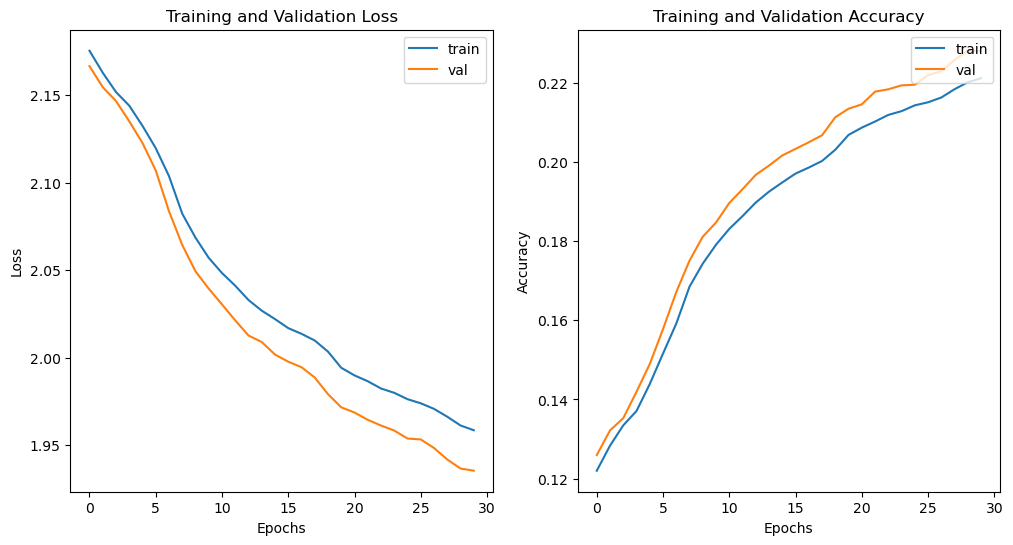

In [63]:
loss_acc_plot(history2)

In [67]:
training_accuracy2 = history2.history['accuracy'][-1]
training_loss2 = history2.history['loss'][-1]
print(f"Training Loss: {training_loss2:.4f}, Training Accuracy: {training_accuracy2:.4f}")

Training Loss: 1.8927, Training Accuracy: 0.2503


In [68]:
val_loss2, val_accuracy2 = cnn_model2.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss2:.4f}, Validation Accuracy: {val_accuracy2:.4f}")

6250/6250 [==============================] - 12s 2ms/step - loss: 1.8568 - accuracy: 0.2627
Done!
Valiation Loss: 1.8568, Validation Accuracy: 0.2627


After 100 epochs, the training accuracy is only 0.2503. The model takes a longer time to train and the prediction is low. The model is underfitting. 

#### CNN Model 3

[Return to top](#Final-Project:-Applied-Deep-Learning)

Let's build on top of the CNN Model 1 with **MaxPooling**.

**Pooling layers** can help to reduce the dimensions of the feature maps of convolution. It can help the model focus only on the detected pattern. **Max Pooling** will find the maximum values at a specific area of the feature map. Adding pooling layers can help speed up the training time and reduce overfitting issues. 

The model is using **MaxPooling2d** with (3,3) since it makes sense with a 9 X 9 sudoku board game.

In [69]:
def cnn_model_func3():
    
    model = tf.keras.Sequential()
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(1,1), activation='relu', padding='same'))
    
    # adding MaxPooling layer
    model.add(MaxPooling2D(3,3))
    
    model.add(Flatten())
    model.add(Dense(81*9))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [70]:
# Initialise the cnn model
cnn_model3 = cnn_model_func3()
# print summary of the cnn model
cnn_model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          640       
                                                                 
 batch_normalization_2 (Batc  (None, 9, 9, 64)         256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 batch_normalization_3 (Batc  (None, 9, 9, 64)         256       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 128)         8320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 128)       

In [71]:
# Train the model
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history3 = cnn_model3.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
12500/12500 [==============================] - 52s 4ms/step - loss: 1.4390 - accuracy: 0.4503 - val_loss: 1.1656 - val_accuracy: 0.5610
Epoch 2/30
12500/12500 [==============================] - 51s 4ms/step - loss: 1.0534 - accuracy: 0.6039 - val_loss: 0.9830 - val_accuracy: 0.6294
Epoch 3/30
12500/12500 [==============================] - 50s 4ms/step - loss: 0.9294 - accuracy: 0.6477 - val_loss: 0.9005 - val_accuracy: 0.6578
Epoch 4/30
12500/12500 [==============================] - 50s 4ms/step - loss: 0.8626 - accuracy: 0.6704 - val_loss: 0.8400 - val_accuracy: 0.6767
Epoch 5/30
12500/12500 [==============================] - 50s 4ms/step - loss: 0.8077 - accuracy: 0.6880 - val_loss: 0.7978 - val_accuracy: 0.6907
Epoch 6/30
12500/12500 [==============================] - 50s 4ms/step - loss: 0.7696 - accuracy: 0.6999 - val_loss: 0.7638 - val_accuracy: 0.7014
Epoch 7/30
12500/12500 [==============================] - 50s 4ms/step - loss: 0.7417 - accuracy: 0.7085 - val_loss: 0

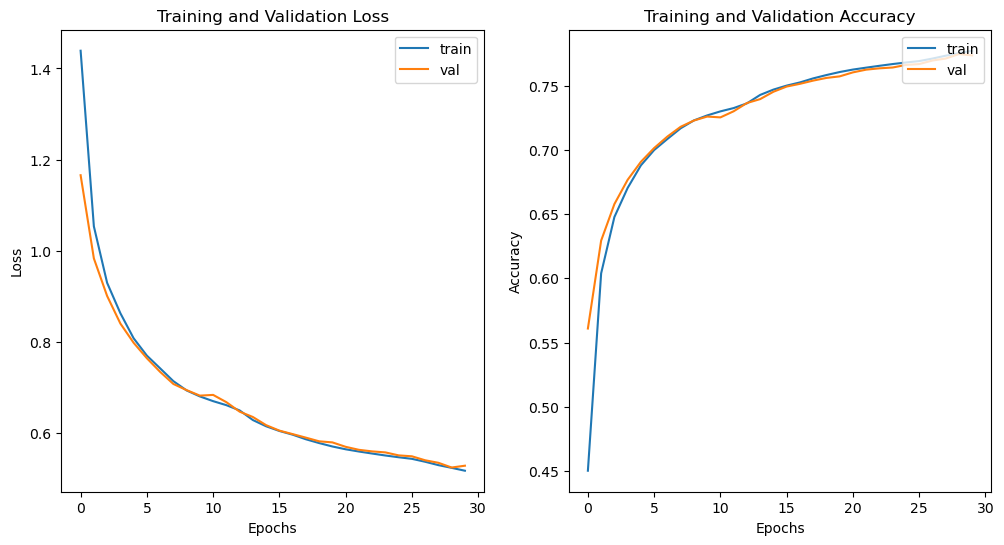

In [72]:
loss_acc_plot(history3)

In [73]:
training_accuracy3 = history3.history['accuracy'][-1]
training_loss3 = history3.history['loss'][-1]
print(f"Training Loss: {training_loss3:.4f}, Training Accuracy: {training_accuracy3:.4f}")

Training Loss: 0.5169, Training Accuracy: 0.7771


In [74]:
val_loss3, val_accuracy3 = cnn_model3.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss3:.4f}, Validation Accuracy: {val_accuracy3:.4f}")

6250/6250 [==============================] - 16s 3ms/step - loss: 0.5279 - accuracy: 0.7735
Done!
Valiation Loss: 0.5279, Validation Accuracy: 0.7735


After 30 epochs, the model has a training accuracy of 0.7771. The training accuracy is still low. 

#### CNN Model 4

[Return to top](#Final-Project:-Applied-Deep-Learning)

Let's build on top of the CNN Model 1 with **strides of (3x3)**. Considering a valid Sudoku solution must follow each of the nine 3 X 3 sub-squares must contain 1 - 9 without repetition. 

**Stride** defines how many steps we are moving in each step in convolution. Using a stride of (3,3) means the convolution moving each of the nine 3 x 3 sub-squares. 

Since the first model was overfitting. Let's add a **Dropout** layer of 20%. 

In [90]:
# Function for the cnn model function
def cnn_model_func4():
    
    model = tf.keras.Sequential()
     # add a convolution layer with 64 kernels of shape (3 x 3), strides (3,3)
    model.add(Conv2D(64, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(1,1), strides=(3,3), activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(81*9))
    # add a dropout layer of 10% to prevent overfitting
    model.add(Dropout(.10))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [91]:
# Initialise the cnn model
cnn_model4 = cnn_model_func4()
# print summary of the cnn model
cnn_model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 3, 3, 64)          640       
                                                                 
 batch_normalization_12 (Bat  (None, 3, 3, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 1, 1, 64)          36928     
                                                                 
 batch_normalization_13 (Bat  (None, 1, 1, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 1, 1, 128)         8320      
                                                                 
 flatten_9 (Flatten)         (None, 128)              

In [92]:
# Train the model
cnn_model4.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history4 = cnn_model4.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
25000/25000 [==============================] - 95s 4ms/step - loss: 1.9399 - accuracy: 0.2204 - val_loss: 1.8473 - val_accuracy: 0.2385
Epoch 2/100
25000/25000 [==============================] - 94s 4ms/step - loss: 1.9016 - accuracy: 0.2339 - val_loss: 1.8246 - val_accuracy: 0.2499
Epoch 3/100
25000/25000 [==============================] - 115s 5ms/step - loss: 1.8843 - accuracy: 0.2430 - val_loss: 1.8066 - val_accuracy: 0.2620
Epoch 4/100
25000/25000 [==============================] - 92s 4ms/step - loss: 1.8704 - accuracy: 0.2533 - val_loss: 1.7950 - val_accuracy: 0.2708
Epoch 5/100
25000/25000 [==============================] - 92s 4ms/step - loss: 1.8618 - accuracy: 0.2598 - val_loss: 1.7897 - val_accuracy: 0.2767
Epoch 6/100
25000/25000 [==============================] - 93s 4ms/step - loss: 1.8551 - accuracy: 0.2650 - val_loss: 1.7776 - val_accuracy: 0.2835
Epoch 7/100
25000/25000 [==============================] - 94s 4ms/step - loss: 1.8495 - accuracy: 0.2688 - val

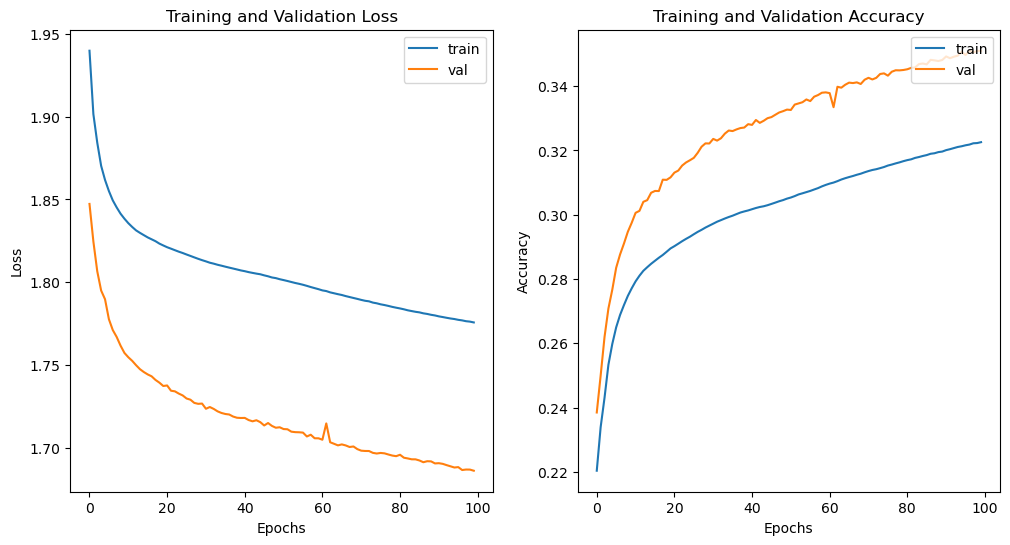

In [93]:
loss_acc_plot(history4)

In [94]:
training_accuracy4 = history4.history['accuracy'][-1]
training_loss4 = history4.history['loss'][-1]
print(f"Training Loss: {training_loss4:.4f}, Training Accuracy: {training_accuracy4:.4f}")

Training Loss: 1.7757, Training Accuracy: 0.3226


In [95]:
val_loss4, val_accuracy4 = cnn_model4.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss4:.4f}, Validation Accuracy: {val_accuracy4:.4f}")

6250/6250 [==============================] - 14s 2ms/step - loss: 1.6860 - accuracy: 0.3510
Done!
Valiation Loss: 1.6860, Validation Accuracy: 0.3510


After 100 epochs, the model generates a training accuracy of 0.3326. The model takes a longer time to train and the model is underfitting. After adding the dropout, the validation accuracy is higher than the training accuracy because adding a 20% dropout means 20% of the features are set to zero. When validating, all features are used so it can lead to higher validation accuracy. 

#### CNN Model 5

[Return to top](#Final-Project:-Applied-Deep-Learning)

Let's add more layers and increase the number of neurons to see if the model performs better. 

In [96]:
# Function for the cnn model function
def cnn_model_func5():
    
    model = tf.keras.Sequential()

    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(1024, kernel_size=(3,3), activation='relu', padding='same'))
    
    model.add(Flatten())
    model.add(Dense(81*9))
    # add a dropout layer of 10% to prevent overfitting
    model.add(Dropout(.1))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [97]:
# Initialise the cnn model
cnn_model5 = cnn_model_func5()
# print summary of the cnn model
cnn_model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 9, 9, 64)          640       
                                                                 
 batch_normalization_14 (Bat  (None, 9, 9, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 batch_normalization_15 (Bat  (None, 9, 9, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_26 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 batch_normalization_16 (Bat  (None, 9, 9, 128)      

In [98]:
# Train the model
cnn_model5.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history5 = cnn_model5.fit(x_train, y_train, batch_size=64, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
12500/12500 [==============================] - 268s 21ms/step - loss: 0.6147 - accuracy: 0.7647 - val_loss: 0.3002 - val_accuracy: 0.8734
Epoch 2/8
12500/12500 [==============================] - 244s 20ms/step - loss: 0.3574 - accuracy: 0.8528 - val_loss: 0.2360 - val_accuracy: 0.9028
Epoch 3/8
12500/12500 [==============================] - 243s 19ms/step - loss: 0.3044 - accuracy: 0.8736 - val_loss: 0.2038 - val_accuracy: 0.9167
Epoch 4/8
12500/12500 [==============================] - 243s 19ms/step - loss: 0.2730 - accuracy: 0.8860 - val_loss: 0.1846 - val_accuracy: 0.9253
Epoch 5/8
12500/12500 [==============================] - 247s 20ms/step - loss: 0.2503 - accuracy: 0.8950 - val_loss: 0.1746 - val_accuracy: 0.9301
Epoch 6/8
12500/12500 [==============================] - 249s 20ms/step - loss: 0.2297 - accuracy: 0.9033 - val_loss: 0.1708 - val_accuracy: 0.9323
Epoch 7/8
12500/12500 [==============================] - 249s 20ms/step - loss: 0.2066 - accuracy: 0.9127 - val_

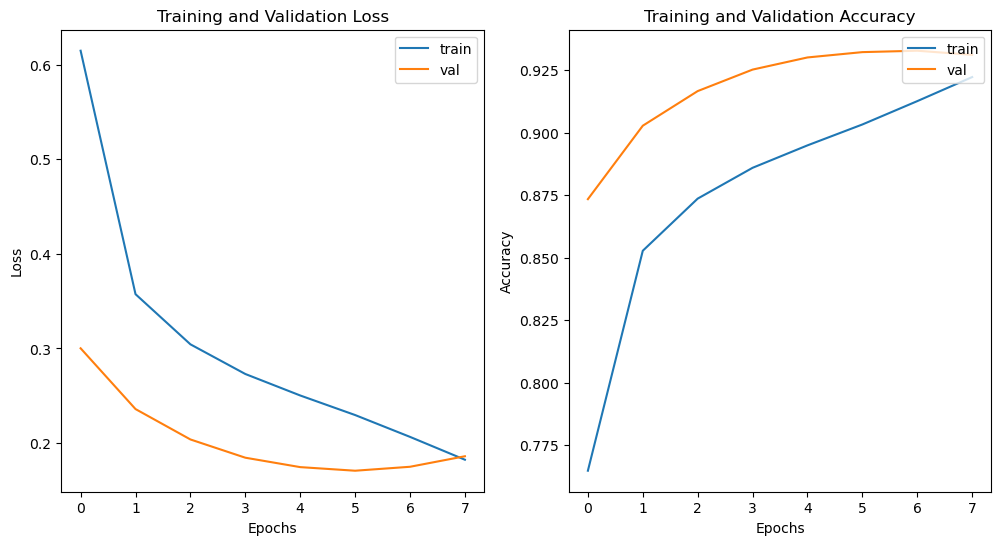

In [99]:
loss_acc_plot(history5)

In [100]:
training_accuracy5 = history5.history['accuracy'][-1]
training_loss5 = history5.history['loss'][-1]
print(f"Training Loss: {training_loss5:.4f}, Training Accuracy: {training_accuracy5:.4f}")

Training Loss: 0.1824, Training Accuracy: 0.9223


In [101]:
val_loss5, val_accuracy5 = cnn_model5.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss5:.4f}, Validation Accuracy: {val_accuracy5:.4f}")

6250/6250 [==============================] - 29s 5ms/step - loss: 0.1861 - accuracy: 0.9312
Done!
Valiation Loss: 0.1861, Validation Accuracy: 0.9312


After 8 epochs, the training accuracy is 0.9223 and the validation accuracy is 0.9312. This is a high accuracy; however, if we check the graph that compared the training and validation loss, we can see that the model is overfitting after five epochs since the validation loss is increasing but the training loss is still decreasing. 

#### CNN Model 6

[Return to top](#Final-Project:-Applied-Deep-Learning)

Adding strides of (3x3) to see how it performs. 

In [102]:
# Function for the cnn model function
def cnn_model_func6():
    
    model = tf.keras.Sequential()

    model.add(Conv2D(32, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(1024, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(81*9))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [103]:
# Initialise the cnn model
cnn_model6 = cnn_model_func6()
# print summary of the cnn model
cnn_model6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 3, 3, 32)          320       
                                                                 
 batch_normalization_19 (Bat  (None, 3, 3, 32)         128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 1, 1, 64)          18496     
                                                                 
 batch_normalization_20 (Bat  (None, 1, 1, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 1, 1, 128)         73856     
                                                                 
 batch_normalization_21 (Bat  (None, 1, 1, 128)      

In [104]:
# Train the model
cnn_model6.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history6 = cnn_model6.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
12500/12500 [==============================] - 98s 8ms/step - loss: 2.0258 - accuracy: 0.1999 - val_loss: 1.9509 - val_accuracy: 0.2329
Epoch 2/100
12500/12500 [==============================] - 97s 8ms/step - loss: 1.9316 - accuracy: 0.2439 - val_loss: 1.8801 - val_accuracy: 0.2630
Epoch 3/100
12500/12500 [==============================] - 97s 8ms/step - loss: 1.8876 - accuracy: 0.2593 - val_loss: 1.8490 - val_accuracy: 0.2717
Epoch 4/100
12500/12500 [==============================] - 96s 8ms/step - loss: 1.8642 - accuracy: 0.2661 - val_loss: 1.8218 - val_accuracy: 0.2792
Epoch 5/100
12500/12500 [==============================] - 96s 8ms/step - loss: 1.8453 - accuracy: 0.2717 - val_loss: 1.8042 - val_accuracy: 0.2838
Epoch 6/100
12500/12500 [==============================] - 116s 9ms/step - loss: 1.8284 - accuracy: 0.2768 - val_loss: 1.7900 - val_accuracy: 0.2880
Epoch 7/100
12500/12500 [==============================] - 94s 8ms/step - loss: 1.8147 - accuracy: 0.2814 - val

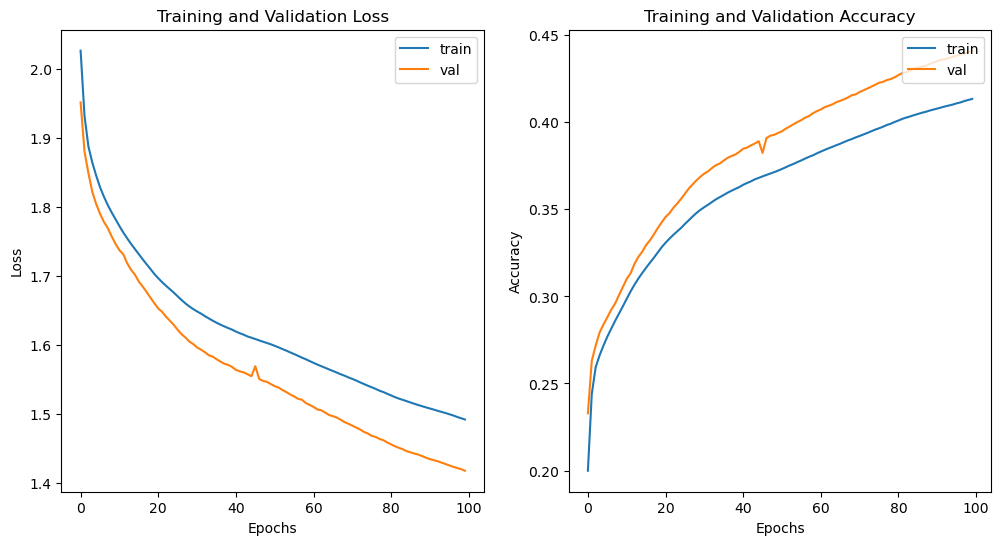

In [105]:
loss_acc_plot(history6)

In [106]:
training_accuracy6 = history6.history['accuracy'][-1]
training_loss6 = history6.history['loss'][-1]
print(f"Training Loss: {training_loss6:.4f}, Training Accuracy: {training_accuracy6:.4f}")

Training Loss: 1.4924, Training Accuracy: 0.4133


In [107]:
val_loss6, val_accuracy6 = cnn_model6.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss6:.4f}, Validation Accuracy: {val_accuracy6:.4f}")

6250/6250 [==============================] - 20s 3ms/step - loss: 1.4183 - accuracy: 0.4410
Done!
Valiation Loss: 1.4183, Validation Accuracy: 0.4410


After 100 epochs, the training accuracy is only 41.33%. The model is underfitting. 

#### CNN Model 7

[Return to top](#Final-Project:-Applied-Deep-Learning)

Testing model with strides of (2x2).

In [108]:
def cnn_model_func7():
    
    model = tf.keras.Sequential()

    model.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', input_shape=(9,9,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(1024, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(81*9))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [109]:
# Initialise the cnn model
cnn_model7 = cnn_model_func7()
# print summary of the cnn model
cnn_model7.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 5, 5, 32)          320       
                                                                 
 batch_normalization_24 (Bat  (None, 5, 5, 32)         128       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 batch_normalization_25 (Bat  (None, 3, 3, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_38 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 batch_normalization_26 (Bat  (None, 2, 2, 128)      

In [110]:
# Train the model
cnn_model7.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history7 = cnn_model7.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
12500/12500 [==============================] - 97s 8ms/step - loss: 1.9570 - accuracy: 0.2226 - val_loss: 1.8521 - val_accuracy: 0.2617
Epoch 2/100
12500/12500 [==============================] - 95s 8ms/step - loss: 1.8050 - accuracy: 0.2751 - val_loss: 1.7312 - val_accuracy: 0.2938
Epoch 3/100
12500/12500 [==============================] - 95s 8ms/step - loss: 1.7237 - accuracy: 0.2963 - val_loss: 1.6898 - val_accuracy: 0.3035
Epoch 4/100
12500/12500 [==============================] - 118s 9ms/step - loss: 1.7032 - accuracy: 0.3015 - val_loss: 1.6781 - val_accuracy: 0.3060
Epoch 5/100
12500/12500 [==============================] - 95s 8ms/step - loss: 1.6922 - accuracy: 0.3044 - val_loss: 1.6675 - val_accuracy: 0.3083
Epoch 6/100
12500/12500 [==============================] - 93s 7ms/step - loss: 1.6827 - accuracy: 0.3069 - val_loss: 1.6605 - val_accuracy: 0.3097
Epoch 7/100
12500/12500 [==============================] - 92s 7ms/step - loss: 1.6748 - accuracy: 0.3089 - val

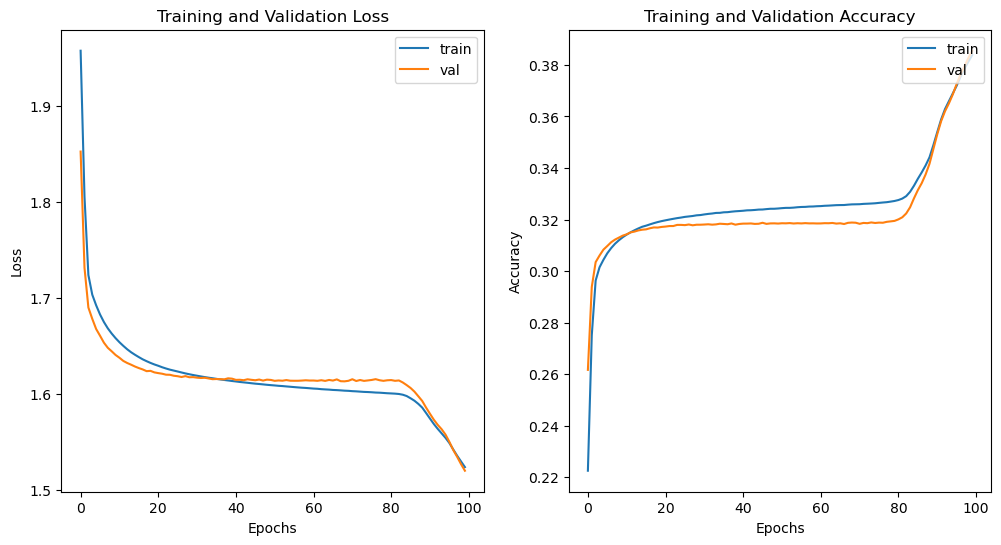

In [111]:
loss_acc_plot(history7)

In [112]:
training_accuracy7 = history7.history['accuracy'][-1]
training_loss7 = history7.history['loss'][-1]
print(f"Training Loss: {training_loss7:.4f}, Training Accuracy: {training_accuracy7:.4f}")

Training Loss: 1.5239, Training Accuracy: 0.3838


In [113]:
val_loss7, val_accuracy7 = cnn_model7.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss7:.4f}, Validation Accuracy: {val_accuracy7:.4f}")

6250/6250 [==============================] - 19s 3ms/step - loss: 1.5201 - accuracy: 0.3855
Done!
Valiation Loss: 1.5201, Validation Accuracy: 0.3855


The training accuracy is 0.3838, using strides (2X2) is not preferable. 

#### CNN Model 8

[Return to top](#Final-Project:-Applied-Deep-Learning)

Using 6 convolution layers with 512 kernels to see if the model performance has improved. 

In [50]:
# Function for the cnn model function
def cnn_model_func8():
    
    model = tf.keras.Sequential()

    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(81*9))
    model.add(Dropout(0.1))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [51]:
# Initialise the cnn model
cnn_model8 = cnn_model_func8()
# print summary of the cnn model
cnn_model8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 9, 9, 512)         5120      
                                                                 
 batch_normalization_5 (Batc  (None, 9, 9, 512)        2048      
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 512)         2359808   
                                                                 
 batch_normalization_6 (Batc  (None, 9, 9, 512)        2048      
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 512)         2359808   
                                                                 
 batch_normalization_7 (Batc  (None, 9, 9, 512)       

In [52]:
# Train the model
cnn_model8.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history8 = cnn_model8.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
12500/12500 [==============================] - 326s 26ms/step - loss: 0.6094 - accuracy: 0.7667 - val_loss: 0.2944 - val_accuracy: 0.8764
Epoch 2/5
12500/12500 [==============================] - 325s 26ms/step - loss: 0.3510 - accuracy: 0.8552 - val_loss: 0.2278 - val_accuracy: 0.9059
Epoch 3/5
12500/12500 [==============================] - 331s 26ms/step - loss: 0.2928 - accuracy: 0.8781 - val_loss: 0.1904 - val_accuracy: 0.9228
Epoch 4/5
12500/12500 [==============================] - 330s 26ms/step - loss: 0.2556 - accuracy: 0.8929 - val_loss: 0.1669 - val_accuracy: 0.9332
Epoch 5/5
12500/12500 [==============================] - 332s 27ms/step - loss: 0.2268 - accuracy: 0.9043 - val_loss: 0.1500 - val_accuracy: 0.9410


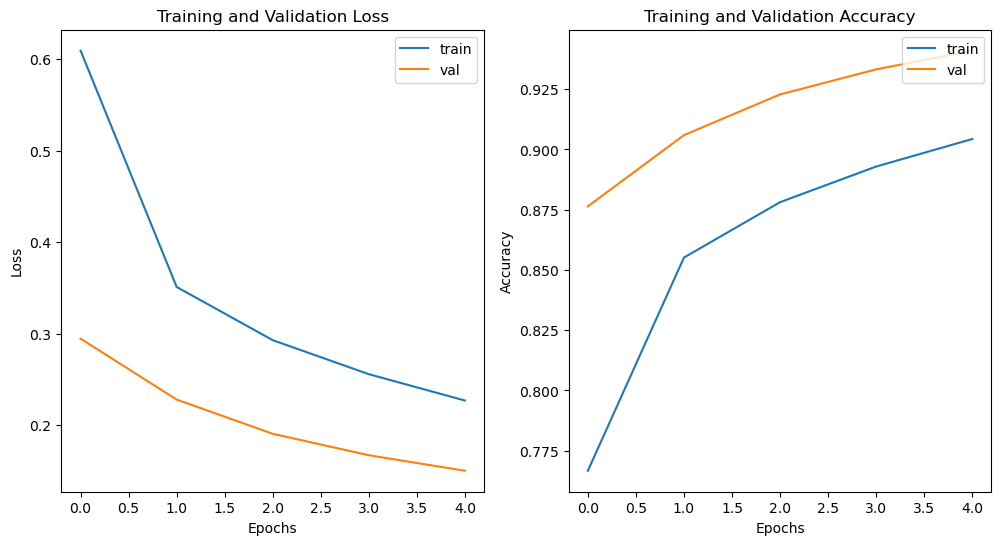

In [53]:
loss_acc_plot(history8)

In [54]:
training_accuracy8 = history8.history['accuracy'][-1]
training_loss8 = history8.history['loss'][-1]
print(f"Training Loss: {training_loss8:.4f}, Training Accuracy: {training_accuracy8:.4f}")

Training Loss: 0.2268, Training Accuracy: 0.9043


In [55]:
val_loss8, val_accuracy8 = cnn_model8.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss8:.4f}, Validation Accuracy: {val_accuracy8:.4f}")

6250/6250 [==============================] - 35s 6ms/step - loss: 0.1500 - accuracy: 0.9410
Done!
Valiation Loss: 0.1500, Validation Accuracy: 0.9410


The training accuracy improved to 90.43%. From the graph above, the model doesn't seem to be overfitting. Let's use the model to predict the quiz to see how it performs. 

In [56]:
train_pred_8 = cnn_model8.predict(x_train[0].reshape((9, 9)).reshape(1, 9, 9, 1)).argmax(-1)+1
train_pred_8

array([[[8, 6, 4, 3, 7, 1, 2, 5, 9],
        [3, 2, 5, 8, 4, 9, 7, 6, 1],
        [8, 7, 1, 2, 6, 5, 8, 4, 3],
        [4, 3, 6, 1, 9, 2, 5, 8, 7],
        [1, 9, 8, 6, 5, 7, 4, 3, 2],
        [2, 5, 7, 4, 8, 3, 9, 1, 6],
        [6, 8, 9, 7, 3, 4, 1, 2, 5],
        [7, 1, 3, 5, 2, 8, 6, 9, 4],
        [5, 4, 2, 9, 1, 6, 3, 7, 8]]], dtype=int64)

In [57]:
train_real_8 = y_train[0]+1
train_real_8

array([[8, 6, 4, 3, 7, 1, 2, 5, 9],
       [3, 2, 5, 8, 4, 9, 7, 6, 1],
       [9, 7, 1, 2, 6, 5, 8, 4, 3],
       [4, 3, 6, 1, 9, 2, 5, 8, 7],
       [1, 9, 8, 6, 5, 7, 4, 3, 2],
       [2, 5, 7, 4, 8, 3, 9, 1, 6],
       [6, 8, 9, 7, 3, 4, 1, 2, 5],
       [7, 1, 3, 5, 2, 8, 6, 9, 4],
       [5, 4, 2, 9, 1, 6, 3, 7, 8]])

In [58]:
train_pred_8 - train_real_8

array([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [-1,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0]]], dtype=int64)

There is one wrong prediction. 

In [59]:
test_pred_8 = cnn_model8.predict(x_test[1].reshape((9, 9)).reshape(1, 9, 9, 1)).argmax(-1)+1
test_pred_8

array([[[3, 1, 8, 4, 9, 2, 7, 5, 5],
        [7, 9, 6, 5, 1, 8, 2, 4, 3],
        [2, 5, 4, 3, 7, 6, 1, 8, 1],
        [8, 8, 9, 6, 4, 1, 5, 3, 7],
        [6, 7, 1, 2, 8, 5, 4, 9, 4],
        [5, 4, 3, 7, 3, 9, 6, 2, 8],
        [4, 3, 2, 8, 5, 7, 9, 1, 6],
        [1, 6, 5, 9, 2, 3, 8, 7, 4],
        [9, 6, 7, 1, 6, 4, 3, 5, 2]]], dtype=int64)

In [60]:
test_real_8 = y_test[1]+1
test_real_8

array([[3, 1, 8, 4, 9, 2, 7, 6, 5],
       [7, 9, 6, 5, 1, 8, 2, 4, 3],
       [2, 5, 4, 3, 7, 6, 1, 8, 9],
       [8, 2, 9, 6, 4, 1, 5, 3, 7],
       [6, 7, 3, 2, 8, 5, 4, 9, 1],
       [5, 4, 1, 7, 3, 9, 6, 2, 8],
       [4, 3, 2, 8, 5, 7, 9, 1, 6],
       [1, 6, 5, 9, 2, 3, 8, 7, 4],
       [9, 8, 7, 1, 6, 4, 3, 5, 2]])

In [61]:
test_pred_8 - test_real_8

array([[[ 0,  0,  0,  0,  0,  0,  0, -1,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0, -8],
        [ 0,  6,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, -2,  0,  0,  0,  0,  0,  3],
        [ 0,  0,  2,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, -2,  0,  0,  0,  0,  0,  0,  0]]], dtype=int64)

There are 7 out of 81 wrong prediction on one of the testing quiz. This is not a good performance model. 

#### CNN Model 9

[Return to top](#Final-Project:-Applied-Deep-Learning)

Let's build on top of the CNN Model 8 with strides of (3x3).

In [49]:
# Function for the cnn model function
def cnn_model_func9():
    
    model = tf.keras.Sequential()

    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(81*9))
    model.add(Dropout(0.1))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [50]:
# Initialise the cnn model
cnn_model9 = cnn_model_func9()
# print summary of the cnn model
cnn_model9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 3, 3, 512)         5120      
                                                                 
 batch_normalization_17 (Bat  (None, 3, 3, 512)        2048      
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 1, 512)         2359808   
                                                                 
 batch_normalization_18 (Bat  (None, 1, 1, 512)        2048      
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 1, 512)         2359808   
                                                                 
 batch_normalization_19 (Bat  (None, 1, 1, 512)       

In [51]:
# Train the model
cnn_model9.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history9 = cnn_model9.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
12500/12500 [==============================] - 144s 11ms/step - loss: 1.9109 - accuracy: 0.2476 - val_loss: 1.7493 - val_accuracy: 0.3004
Epoch 2/200
12500/12500 [==============================] - 140s 11ms/step - loss: 1.7559 - accuracy: 0.3070 - val_loss: 1.6532 - val_accuracy: 0.3464
Epoch 3/200
12500/12500 [==============================] - 140s 11ms/step - loss: 1.6615 - accuracy: 0.3508 - val_loss: 1.5549 - val_accuracy: 0.3911
Epoch 4/200
12500/12500 [==============================] - 140s 11ms/step - loss: 1.5946 - accuracy: 0.3787 - val_loss: 1.4950 - val_accuracy: 0.4168
Epoch 5/200
12500/12500 [==============================] - 141s 11ms/step - loss: 1.5455 - accuracy: 0.4013 - val_loss: 1.4420 - val_accuracy: 0.4418
Epoch 6/200
12500/12500 [==============================] - 141s 11ms/step - loss: 1.4993 - accuracy: 0.4215 - val_loss: 1.3928 - val_accuracy: 0.4620
Epoch 7/200
12500/12500 [==============================] - 141s 11ms/step - loss: 1.4606 - accuracy:

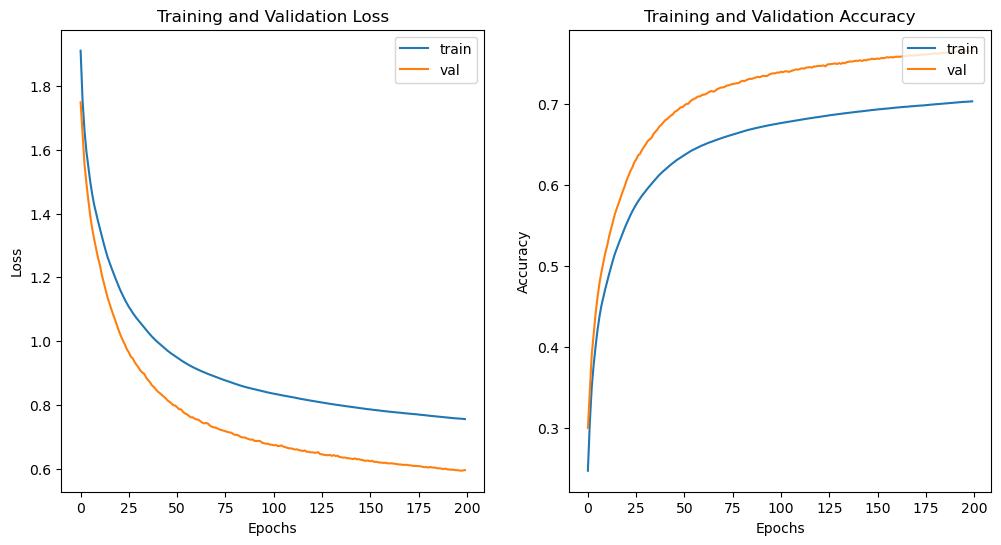

In [52]:
loss_acc_plot(history9)

In [53]:
training_accuracy9 = history9.history['accuracy'][-1]
training_loss9 = history9.history['loss'][-1]
print(f"Training Loss: {training_loss9:.4f}, Training Accuracy: {training_accuracy9:.4f}")

Training Loss: 0.7551, Training Accuracy: 0.7037


In [54]:
val_loss9, val_accuracy9 = cnn_model9.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss9:.4f}, Validation Accuracy: {val_accuracy9:.4f}")

6250/6250 [==============================] - 25s 4ms/step - loss: 0.5950 - accuracy: 0.7656
Done!
Valiation Loss: 0.5950, Validation Accuracy: 0.7656


After 200 epochs, the training accuracy is only 70.37%. From the training above, we can see the accuracy is slowly increasing by 0.0002 for each epoch. 

#### CNN Model 10

[Return to top](#Final-Project:-Applied-Deep-Learning)

Trying with 18 conv2D layer to see if it has a better performance. 

In [46]:
# Function for the cnn model function
def cnn_model_func10():
    
    model = tf.keras.Sequential()

    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(81*9))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [47]:
# Initialise the cnn model
cnn_model10 = cnn_model_func10()
# print summary of the cnn model
cnn_model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 3, 512)         5120      
                                                                 
 batch_normalization (BatchN  (None, 3, 3, 512)        2048      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 512)         2359808   
                                                                 
 batch_normalization_1 (Batc  (None, 1, 1, 512)        2048      
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 512)         2359808   
                                                                 
 batch_normalization_2 (Batc  (None, 1, 1, 512)        2

In [48]:
# Train the model
cnn_model10.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history10 = cnn_model10.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
12500/12500 [==============================] - 500s 34ms/step - loss: 2.1270 - accuracy: 0.1599 - val_loss: 2.0514 - val_accuracy: 0.1850
Epoch 2/100
12500/12500 [==============================] - 425s 34ms/step - loss: 2.0577 - accuracy: 0.1807 - val_loss: 2.0488 - val_accuracy: 0.1848
Epoch 3/100
12500/12500 [==============================] - 420s 34ms/step - loss: 2.0426 - accuracy: 0.1816 - val_loss: 2.0287 - val_accuracy: 0.1902
Epoch 4/100
12500/12500 [==============================] - 423s 34ms/step - loss: 2.0453 - accuracy: 0.1802 - val_loss: 2.0259 - val_accuracy: 0.1905
Epoch 5/100
12500/12500 [==============================] - 430s 34ms/step - loss: 2.0578 - accuracy: 0.1769 - val_loss: 2.0840 - val_accuracy: 0.1753
Epoch 6/100
12500/12500 [==============================] - 432s 35ms/step - loss: 2.0501 - accuracy: 0.1784 - val_loss: 2.0155 - val_accuracy: 0.1933
Epoch 7/100
12500/12500 [==============================] - 432s 35ms/step - loss: 2.0528 - accuracy:

KeyboardInterrupt: 

After 63 epochs with about 6 hours of training, I interrupt the training by the keyboard. The training accuracy is only 19% with a slow increase. The training is incomplete. 

#### CNN Model 11

[Return to top](#Final-Project:-Applied-Deep-Learning)

Testing with 9 conv2D layers, 9 is matching 9 numbers of Sudoku and the game board is 9 x 9. 

In [44]:
# Function for the cnn model function
def cnn_model_func11():
    
    model = tf.keras.Sequential()

    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(81*9))
    model.add(Dropout(0.1))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [45]:
# Initialise the cnn model
cnn_model11 = cnn_model_func11()
# print summary of the cnn model
cnn_model11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 512)         5120      
                                                                 
 batch_normalization (BatchN  (None, 9, 9, 512)        2048      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 512)         2359808   
                                                                 
 batch_normalization_1 (Batc  (None, 9, 9, 512)        2048      
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 512)         2359808   
                                                                 
 batch_normalization_2 (Batc  (None, 9, 9, 512)        2

In [46]:
# Train the model
cnn_model11.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history11 = cnn_model11.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
12500/12500 [==============================] - 564s 39ms/step - loss: 0.5101 - accuracy: 0.8091 - val_loss: 0.1727 - val_accuracy: 0.9333
Epoch 2/5
12500/12500 [==============================] - 491s 39ms/step - loss: 0.1937 - accuracy: 0.9192 - val_loss: 0.0821 - val_accuracy: 0.9691
Epoch 3/5
12500/12500 [==============================] - 493s 39ms/step - loss: 0.1324 - accuracy: 0.9408 - val_loss: 0.0589 - val_accuracy: 0.9781
Epoch 4/5
12500/12500 [==============================] - 493s 39ms/step - loss: 0.1080 - accuracy: 0.9490 - val_loss: 0.0519 - val_accuracy: 0.9813
Epoch 5/5
12500/12500 [==============================] - 493s 39ms/step - loss: 0.0930 - accuracy: 0.9540 - val_loss: 0.0493 - val_accuracy: 0.9827


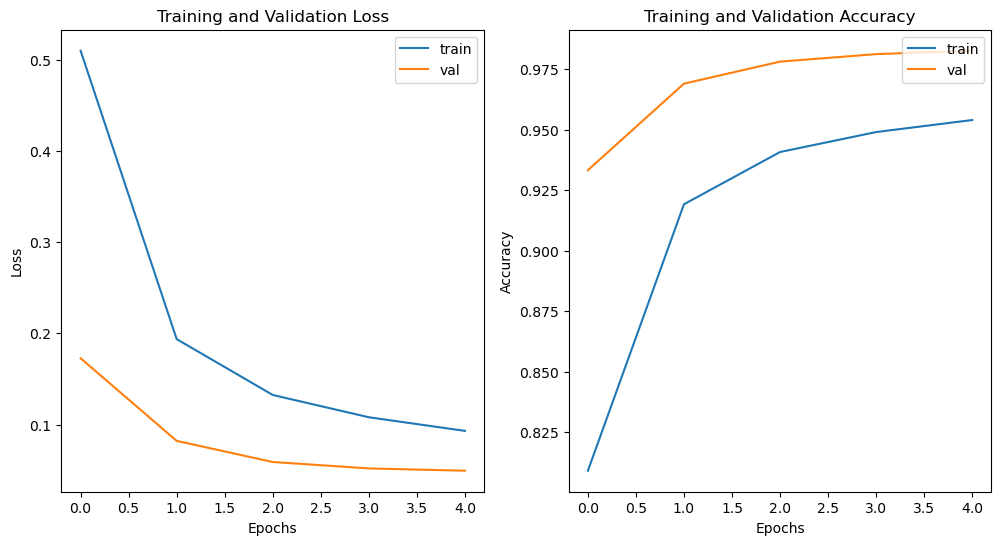

In [47]:
loss_acc_plot(history11)

In [48]:
training_accuracy11 = history11.history['accuracy'][-1]
training_loss11 = history11.history['loss'][-1]
print(f"Training Loss: {training_loss11:.4f}, Training Accuracy: {training_accuracy11:.4f}")

Training Loss: 0.0930, Training Accuracy: 0.9540


In [49]:
val_loss11, val_accuracy11 = cnn_model11.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss11:.4f}, Validation Accuracy: {val_accuracy11:.4f}")

6250/6250 [==============================] - 48s 8ms/step - loss: 0.0493 - accuracy: 0.9827
Done!
Valiation Loss: 0.0493, Validation Accuracy: 0.9827


After only five epochs, the model has a 95.4% training accuracy. The model performance is desirable. 

### Recurrent Neural Networks (RNN)

[Return to top](#Final-Project:-Applied-Deep-Learning)

Because sudoku is a logic-based game and relies on the number and the position of clues available on the board. Recurrent neural networks (RNNs) can be used for model training. Recurrent Neural Networks use sequential data to make a prediction. It is powerful for modelling time series data or natural language processing. 

Building a sudoku with RNN is complex. The sequence for the game is not easy to store. For example, making an RNN model to predict stock price requires checking the previous 10 days of the stock price data. However, the sudoku game requires checking the number that fills in on the board each time. It may require building a function to check all the clues on the board and check the available digits for the game. In this project, we are testing a simple RNN model. 

#### RNN Model 1

In [127]:
def rnn_model_func1():
    model = Sequential()
    model.add(SimpleRNN(32, input_shape=(9,9), return_sequences=True))
    model.add(Flatten())
    model.add(Input(81,9))
    model.add(Dense(81*9))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [128]:
rnn_model1 = rnn_model_func1()
rnn_model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 9, 32)             1344      
                                                                 
 flatten_15 (Flatten)        (None, 288)               0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 dense_23 (Dense)            (None, 729)               210681    
                                                                 
 layer_normalization_15 (Lay  (None, 729)              1458      
 erNormalization)                                                
                                                                 
 reshape_15 (Reshape)        (None, 9, 9, 9)           0         
                                                     

In [129]:
# using categorical_crossentropy b/c targets are one-hot encoded
rnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [130]:
history_rnn1 = rnn_model1.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
12500/12500 [==============================] - 79s 6ms/step - loss: 2.0510 - accuracy: 0.1872 - val_loss: 1.9584 - val_accuracy: 0.2376
Epoch 2/50
12500/12500 [==============================] - 77s 6ms/step - loss: 1.9057 - accuracy: 0.2627 - val_loss: 1.8776 - val_accuracy: 0.2774
Epoch 3/50
12500/12500 [==============================] - 78s 6ms/step - loss: 1.8474 - accuracy: 0.2901 - val_loss: 1.8140 - val_accuracy: 0.3073
Epoch 4/50
12500/12500 [==============================] - 77s 6ms/step - loss: 1.8009 - accuracy: 0.3120 - val_loss: 1.7924 - val_accuracy: 0.3168
Epoch 5/50
12500/12500 [==============================] - 78s 6ms/step - loss: 1.7820 - accuracy: 0.3197 - val_loss: 1.7747 - val_accuracy: 0.3232
Epoch 6/50
12500/12500 [==============================] - 78s 6ms/step - loss: 1.7683 - accuracy: 0.3253 - val_loss: 1.7635 - val_accuracy: 0.3274
Epoch 7/50
12500/12500 [==============================] - 78s 6ms/step - loss: 1.7564 - accuracy: 0.3304 - val_loss: 1

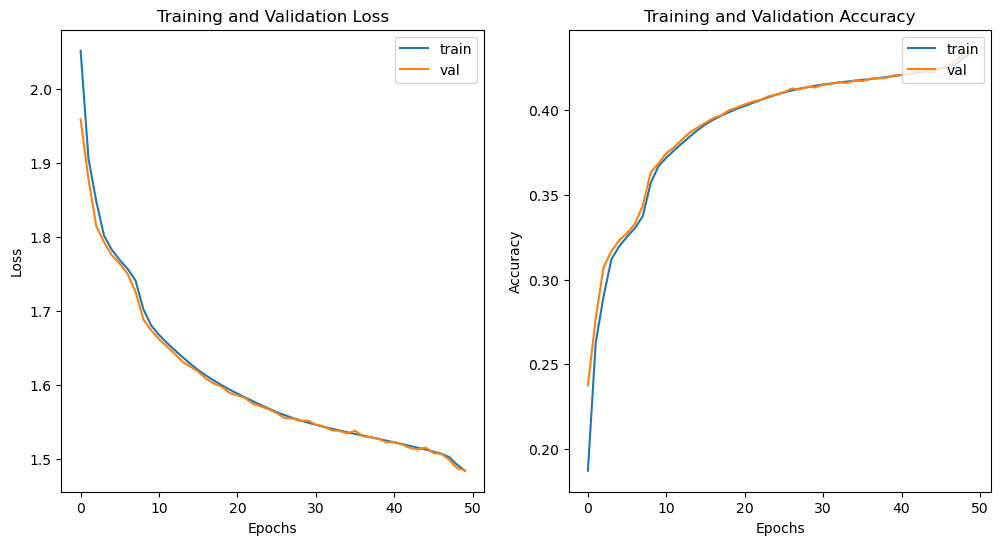

In [131]:
loss_acc_plot(history_rnn1)

In [132]:
training_accuracy_rnn1 = history_rnn1.history['accuracy'][-1]
training_loss_rnn1 = history_rnn1.history['loss'][-1]
print(f"Training Loss: {training_loss_rnn1:.4f}, Training Accuracy: {training_accuracy_rnn1:.4f}")

Training Loss: 1.4840, Training Accuracy: 0.4345


In [133]:
val_loss_rnn1, val_accuracy_rnn1 = rnn_model1.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss_rnn1:.4f}, Validation Accuracy: {val_accuracy_rnn1:.4f}")

6250/6250 [==============================] - 18s 3ms/step - loss: 1.4845 - accuracy: 0.4351
Done!
Valiation Loss: 1.4845, Validation Accuracy: 0.4351


After 50 epochs, the training accuracy is about 43%.

#### RNN Model 2

[Return to top](#Final-Project:-Applied-Deep-Learning)

Adding a convolution layer since it is better to extract features. 

In [134]:
def rnn_model_func2():
    model = Sequential()
    model.add(Conv1D(64, kernel_size=9, activation='relu', padding='same', input_shape=(9,9)))
    model.add(SimpleRNN(32, return_sequences=True))
    model.add(Flatten())
    model.add(Input(81,9))
    model.add(Dense(81*9))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [135]:
rnn_model2 = rnn_model_func2()
rnn_model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 64)             5248      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 9, 32)             3104      
                                                                 
 flatten_16 (Flatten)        (None, 288)               0         
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 dense_24 (Dense)            (None, 729)               210681    
                                                                 
 layer_normalization_16 (Lay  (None, 729)              1458      
 erNormalization)                                                
                                                     

In [136]:
rnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [137]:
history_rnn2 = rnn_model2.fit(x_train, y_train, batch_size=64, epochs=60, validation_data=(x_test, y_test))

Epoch 1/60
12500/12500 [==============================] - 89s 7ms/step - loss: 1.6861 - accuracy: 0.3468 - val_loss: 1.4984 - val_accuracy: 0.4350
Epoch 2/60
12500/12500 [==============================] - 88s 7ms/step - loss: 1.4446 - accuracy: 0.4576 - val_loss: 1.4111 - val_accuracy: 0.4704
Epoch 3/60
12500/12500 [==============================] - 87s 7ms/step - loss: 1.3905 - accuracy: 0.4780 - val_loss: 1.3773 - val_accuracy: 0.4820
Epoch 4/60
12500/12500 [==============================] - 87s 7ms/step - loss: 1.3652 - accuracy: 0.4857 - val_loss: 1.3541 - val_accuracy: 0.4889
Epoch 5/60
12500/12500 [==============================] - 87s 7ms/step - loss: 1.3475 - accuracy: 0.4902 - val_loss: 1.3374 - val_accuracy: 0.4926
Epoch 6/60
12500/12500 [==============================] - 87s 7ms/step - loss: 1.3338 - accuracy: 0.4947 - val_loss: 1.3252 - val_accuracy: 0.4967
Epoch 7/60
12500/12500 [==============================] - 87s 7ms/step - loss: 1.3237 - accuracy: 0.4973 - val_loss: 1

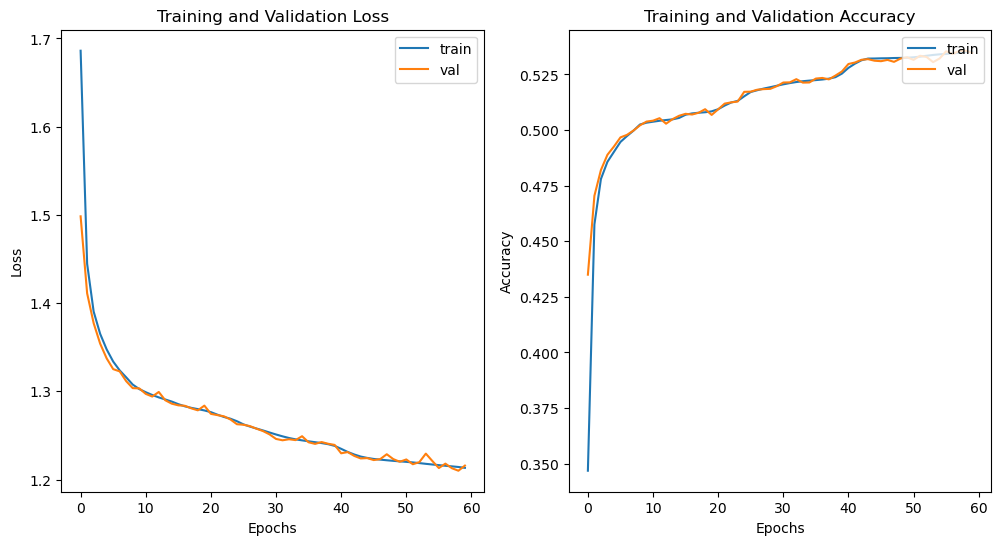

In [138]:
loss_acc_plot(history_rnn2)

In [139]:
training_accuracy_rnn2 = history_rnn2.history['accuracy'][-1]
training_loss_rnn2 = history_rnn2.history['loss'][-1]
print(f"Training Loss: {training_loss_rnn2:.4f}, Training Accuracy: {training_accuracy_rnn2:.4f}")

Training Loss: 1.2133, Training Accuracy: 0.5354


In [140]:
val_loss_rnn2, val_accuracy_rnn2 = rnn_model2.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss_rnn2:.4f}, Validation Accuracy: {val_accuracy_rnn2:.4f}")

6250/6250 [==============================] - 19s 3ms/step - loss: 1.2158 - accuracy: 0.5347
Done!
Valiation Loss: 1.2158, Validation Accuracy: 0.5347


The training accuracy improve a little bit after adding the convolution layer.

### Long Short-Term Memory (LSTM)

[Return to top](#Final-Project:-Applied-Deep-Learning)

Long Short-Term Memory (LSTM) is built on top of RNNs. LSTM adds long-term memory cells to remember past data. Same as RNN, building a sudoku with LSTM is complex. The sequence for the game is not easy to figure out by code. Let's try out a simple LSTM model.

In [142]:
def lstm_model_func1():
    model = Sequential()
    model.add(Conv1D(64, kernel_size=9, activation='relu', padding='same', input_shape=(9,9)))
    model.add(LSTM(32, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Input(81,9))
    model.add(Dense(81*9))
    model.add(tf.keras.layers.LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))
    
    return model

In [143]:
# Initialise the cnn model
lstm_model1 = lstm_model_func1()
# print summary of the cnn model
lstm_model1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 9, 64)             5248      
                                                                 
 module_wrapper (ModuleWrapp  (None, 9, 32)            12416     
 er)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 9, 32)             0         
                                                                 
 module_wrapper_1 (ModuleWra  (None, 9, 32)            8320      
 pper)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 9, 32)             0         
                                                                 
 flatten_17 (Flatten)        (None, 288)             

In [144]:
# Train the model
lstm_model1.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history_lstm1 = lstm_model1.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
12500/12500 [==============================] - 427s 34ms/step - loss: 1.9128 - accuracy: 0.2466 - val_loss: 1.6513 - val_accuracy: 0.3608
Epoch 2/50
12500/12500 [==============================] - 420s 34ms/step - loss: 1.7243 - accuracy: 0.3275 - val_loss: 1.5237 - val_accuracy: 0.4150
Epoch 3/50
12500/12500 [==============================] - 446s 36ms/step - loss: 1.6656 - accuracy: 0.3526 - val_loss: 1.4709 - val_accuracy: 0.4360
Epoch 4/50
12500/12500 [==============================] - 413s 33ms/step - loss: 1.6262 - accuracy: 0.3687 - val_loss: 1.4271 - val_accuracy: 0.4573
Epoch 5/50
12500/12500 [==============================] - 409s 33ms/step - loss: 1.5965 - accuracy: 0.3814 - val_loss: 1.3955 - val_accuracy: 0.4710
Epoch 6/50
12500/12500 [==============================] - 417s 33ms/step - loss: 1.5723 - accuracy: 0.3912 - val_loss: 1.3794 - val_accuracy: 0.4779
Epoch 7/50
12500/12500 [==============================] - 431s 34ms/step - loss: 1.5509 - accuracy: 0.4002

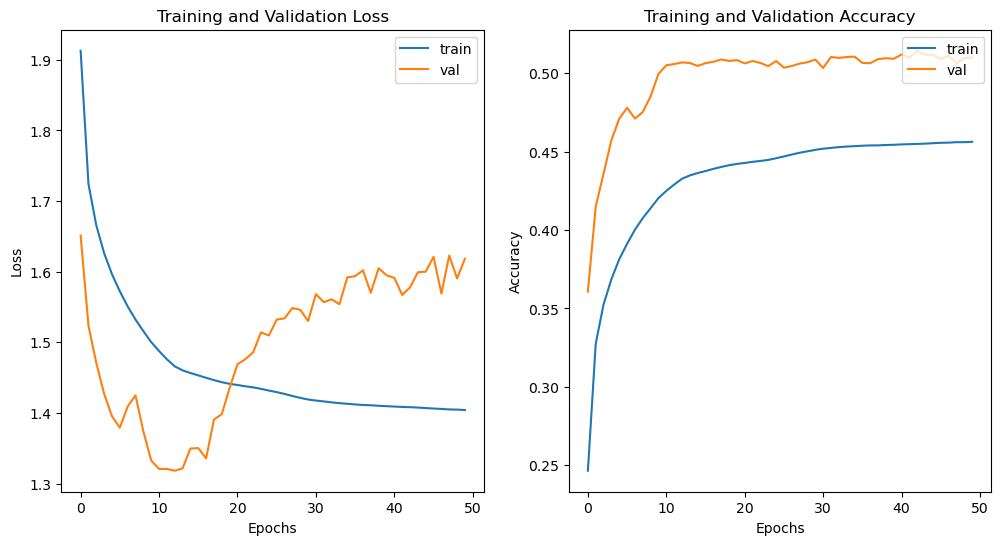

In [145]:
loss_acc_plot(history_lstm1)

In [146]:
training_accuracy_lstm1 = history_lstm1.history['accuracy'][-1]
training_loss_lstm1 = history_lstm1.history['loss'][-1]
print(f"Training Loss: {training_loss_lstm1:.4f}, Training Accuracy: {training_accuracy_lstm1:.4f}")

Training Loss: 1.4042, Training Accuracy: 0.4562


In [147]:
val_loss_lstm1, val_accuracy_lstm1 = lstm_model1.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss_lstm1:.4f}, Validation Accuracy: {val_accuracy_lstm1:.4f}")

6250/6250 [==============================] - 54s 9ms/step - loss: 1.6182 - accuracy: 0.5099
Done!
Valiation Loss: 1.6182, Validation Accuracy: 0.5099


After 50 epochs, the training accuracy is 45.6%. The model is even over fitting since the validation loss decreasing with the increasing training loss.

### Discussion

[Return to top](#Final-Project:-Applied-Deep-Learning)

Let's create a summary table with for each model.

| Model | #_of_layers | #_of_Conv2D | Strides | # of kernels for each Conv2D | # of Dense | MaxPooling2D | Dropout | Batch_size | 	Epochs | Training accuracy | Validation accuracy | Overfit / Underfit | 
|---:| :-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| cnn_model1 | 10 | 3 | None | 64, 64, 128 | 1 | None | None | 32 | 5 | 0.8483 | 0.8358 | Overfit | 
| cnn_model2 | 9 | 1 | None | 64 | 3 | None | 0.2 | 32 | 100 | 0.2503 | 0.2627 | Underfit | 
| cnn_model3 | 11 | 3 | None | 64, 64, 128 | 1 | (3,3) | None | 64 | 30 | 0.7771 | 0.7735 | Underfit |
| cnn_model4 | 11 | 3 | (3,3) | 64, 64, 128 | 1 | None | 0.1 | 32 | 100 | 0.3226 | 0.3510 | Underfit | 
| cnn_model5 | 17 | 6 | None | 64, 64, 128, 256, 512, 1024 | 1 | None | 0.1 | 64 | 8 | 0.9223 | 0.9312 | Overfit after 5 epochs | 
| cnn_model6 | 18 | 6 | (3,3) | 32, 64, 128, 256, 512, 1024 | 2 | None | 0.1 | 64 | 100 | 0.4133 | 0.4410 | Underfit | 
| cnn_model7 | 18 | 6 | (2,2) | 32, 64, 128, 256, 512, 1024 | 2 | None | 0.1 | 64 | 100 | 0.3838 | 0.3855 | underfit | 
| cnn_model8 | 17 | 6 | None | 512, 512, 512, 512, 512, 512 | 1 | None | 0.1 | 64 | 5 | 0.9043 | 0.9410 |  | 
| cnn_model9 | 17 | 6 | (3,3) | 512, 512, 512, 512, 512, 512 | 1 | None | 0.1 | 64 | 200 | 0.5950 | 0.7656 | Underfit | 
| cnn_model10 | 41 | 18 | (3,3) | 512 | 1 | None | 0.2 | 64 | 100 | Incomplete | Incomplete | Incomplete | 
| <strong>cnn_model_11</strong> | 23 | 9 | None | 512 | 1 | None | 0.1 | 64 | 5 | <strong>0.9540<strong> | <strong>0.9827</strong> | <Strong>Best</Strong> | 								
| rnn_model1 | 7 | None | None | None | 1 | None | None | 64 | 50 | 0.4345 | 0.4351	 | Underfit |
| rnn_model2 | 8 | 1 | None | 64 | 1 | None | None | 64 | 60 | 0.5354 | 0.5347 | Underfit |
| lstm_model1 | 11 | 1 | None | 64 | 1 | None | 0.2 | 64 | 50 | 0.4562 | 0.5099 | Overfit | 

Building a sudoku with RNN or LSTM is complex. The models that we tried are too simple and the results are not desirable.

The convolution neural networks (CNN) is good at extracting features. An increase in the number of epochs, number of layers, and number of neurons per layer can help improve the accuracy of the model. In this project, we start with a simple CNN model with 3 conv2D layers. The model is overfitting. So we have tried adding a dropout layer or using maxpooling to prevent overfitting. Adding strides of (3x3) could be good considering valid sudoku must follow each of the nine 3X3 sub-squares and should contain 1-9 digits without repetition. However, models that have strides require longer training hours with more epochs.  

After testing all of the models, the **cnn_model_11** has the best performance in solving sudoku games with a training accuracy of 0.9540 and validation accuracy of 0.9827. 

Let's test the model to see whether it can solve a real sudoku game or not.

In [56]:
train_pred_11 = cnn_model11.predict(x_train[0].reshape((9, 9)).reshape(1, 9, 9, 1)).argmax(-1)+1
train_pred_11

array([[[8, 6, 4, 3, 7, 1, 2, 5, 9],
        [3, 2, 5, 8, 4, 9, 7, 6, 1],
        [9, 7, 1, 2, 6, 5, 8, 4, 3],
        [4, 3, 6, 1, 9, 2, 5, 8, 7],
        [1, 9, 8, 6, 5, 7, 4, 3, 2],
        [2, 5, 7, 4, 8, 3, 9, 1, 6],
        [6, 8, 9, 7, 3, 4, 1, 2, 5],
        [7, 1, 3, 5, 2, 8, 6, 9, 4],
        [5, 4, 2, 9, 1, 6, 3, 7, 8]]], dtype=int64)

In [57]:
train_real_11 = y_train[0]+1
train_real_11

array([[8, 6, 4, 3, 7, 1, 2, 5, 9],
       [3, 2, 5, 8, 4, 9, 7, 6, 1],
       [9, 7, 1, 2, 6, 5, 8, 4, 3],
       [4, 3, 6, 1, 9, 2, 5, 8, 7],
       [1, 9, 8, 6, 5, 7, 4, 3, 2],
       [2, 5, 7, 4, 8, 3, 9, 1, 6],
       [6, 8, 9, 7, 3, 4, 1, 2, 5],
       [7, 1, 3, 5, 2, 8, 6, 9, 4],
       [5, 4, 2, 9, 1, 6, 3, 7, 8]])

In [58]:
train_pred_11 - train_real_11

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]], dtype=int64)

There are all zeros means the model is predicting all 81 numbers correctly! <br>
Let's test it with one of the quizzes from the testing set, which the model hasn't seem before. 

In [53]:
test_pred_11 = cnn_model11.predict(x_test[1].reshape((9, 9)).reshape(1, 9, 9, 1)).argmax(-1)+1
test_pred_11

array([[[3, 1, 8, 4, 9, 2, 7, 6, 5],
        [7, 9, 6, 5, 1, 8, 2, 4, 3],
        [2, 5, 4, 3, 7, 6, 1, 8, 9],
        [8, 2, 9, 6, 4, 1, 5, 3, 7],
        [6, 7, 3, 2, 8, 5, 4, 9, 1],
        [5, 4, 1, 7, 3, 9, 6, 2, 8],
        [4, 3, 2, 8, 5, 7, 9, 1, 6],
        [1, 6, 5, 9, 2, 3, 8, 7, 4],
        [9, 8, 7, 1, 6, 4, 3, 5, 2]]], dtype=int64)

In [54]:
test_real_11 = y_test[1]+1
test_real_11

array([[3, 1, 8, 4, 9, 2, 7, 6, 5],
       [7, 9, 6, 5, 1, 8, 2, 4, 3],
       [2, 5, 4, 3, 7, 6, 1, 8, 9],
       [8, 2, 9, 6, 4, 1, 5, 3, 7],
       [6, 7, 3, 2, 8, 5, 4, 9, 1],
       [5, 4, 1, 7, 3, 9, 6, 2, 8],
       [4, 3, 2, 8, 5, 7, 9, 1, 6],
       [1, 6, 5, 9, 2, 3, 8, 7, 4],
       [9, 8, 7, 1, 6, 4, 3, 5, 2]])

In [55]:
test_pred_11 - test_real_11

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]], dtype=int64)

There are all zeros means the model is predicting all 81 numbers correctly!

#### Confunsion matrix

Use the model to make predict all the testing data. 

In [60]:
y_pred_11 = cnn_model11.predict(x_test)

Since we used normalization to transform the dataset before, we need to create functions to transform the prediction and the testing data back to the real board game with a dimension of (200000, 2). 

In [59]:
def y_pred_func(len, model):
    list = []
    for i in range(len):
        test_pred = model.predict(x_test[i].reshape((9, 9)).reshape(1, 9, 9, 1)).argmax(-1)+1
        list.append((i, test_pred))
    return np.array(list)
            

In [61]:
y_pred_11 = y_pred_func(x_test.shape[0], cnn_model11)

C:\Users\DSMLAzure\AppData\Local\Temp\2\ipykernel_4852\1863722690.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(list)


In [63]:
print(y_pred_11[0])

[0 array([[[4, 9, 7, 3, 2, 5, 6, 8, 1],
           [3, 1, 2, 8, 7, 6, 5, 9, 4],
           [5, 6, 8, 9, 1, 4, 3, 7, 2],
           [9, 8, 4, 6, 3, 2, 1, 5, 7],
           [1, 5, 6, 7, 4, 8, 9, 2, 3],
           [7, 2, 3, 5, 9, 1, 4, 6, 8],
           [6, 3, 1, 2, 8, 9, 7, 4, 5],
           [8, 7, 5, 4, 6, 3, 2, 1, 9],
           [2, 4, 9, 1, 5, 7, 8, 3, 6]]], dtype=int64)]


In [62]:
y_pred_11.shape

(200000, 2)

In [64]:
def y_real_func(data):
    len = data.shape[0]
    list = []
    for i in range(len):
        y_real = data[i] +1
        list.append((i, y_real))
    return np.array(list)

In [68]:
y_real_11 = y_real_func(y_test)

C:\Users\DSMLAzure\AppData\Local\Temp\2\ipykernel_4852\1141021980.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(list)


In [69]:
y_real_11.shape

(200000, 2)

In [86]:
y_real_11[0][1]

array([[4, 9, 7, 3, 2, 5, 6, 8, 1],
       [3, 1, 2, 8, 7, 6, 5, 9, 4],
       [5, 6, 8, 9, 1, 4, 3, 7, 2],
       [9, 8, 4, 6, 3, 2, 1, 5, 7],
       [1, 5, 6, 7, 4, 8, 9, 2, 3],
       [7, 2, 3, 5, 9, 1, 4, 6, 8],
       [6, 3, 1, 2, 8, 9, 7, 4, 5],
       [8, 7, 5, 4, 6, 3, 2, 1, 9],
       [2, 4, 9, 1, 5, 7, 8, 3, 6]])

In [105]:
y_pred_11[0][1][0]

array([[4, 9, 7, 3, 2, 5, 6, 8, 1],
       [3, 1, 2, 8, 7, 6, 5, 9, 4],
       [5, 6, 8, 9, 1, 4, 3, 7, 2],
       [9, 8, 4, 6, 3, 2, 1, 5, 7],
       [1, 5, 6, 7, 4, 8, 9, 2, 3],
       [7, 2, 3, 5, 9, 1, 4, 6, 8],
       [6, 3, 1, 2, 8, 9, 7, 4, 5],
       [8, 7, 5, 4, 6, 3, 2, 1, 9],
       [2, 4, 9, 1, 5, 7, 8, 3, 6]], dtype=int64)

Create a function to calculate the accuracy for each position. 

In [176]:
def count_grid_acc(actual, predicted):
    result = np.zeros((9,9), dtype=np.int)
    for i in range(y_real_11.shape[0]):
        for j in range(9):
            for k in range(9):
                if actual[i][1][j][k] == predicted[i][1][0][j][k]:
                    result[j][k] += 1
    return result
 

In [178]:
cga = count_grid_acc(y_real_11, y_pred_11)

C:\Users\DSMLAzure\AppData\Local\Temp\2\ipykernel_4852\3278397974.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((9,9), dtype=np.int)


Text(220.72222222222223, 0.5, 'Actual')

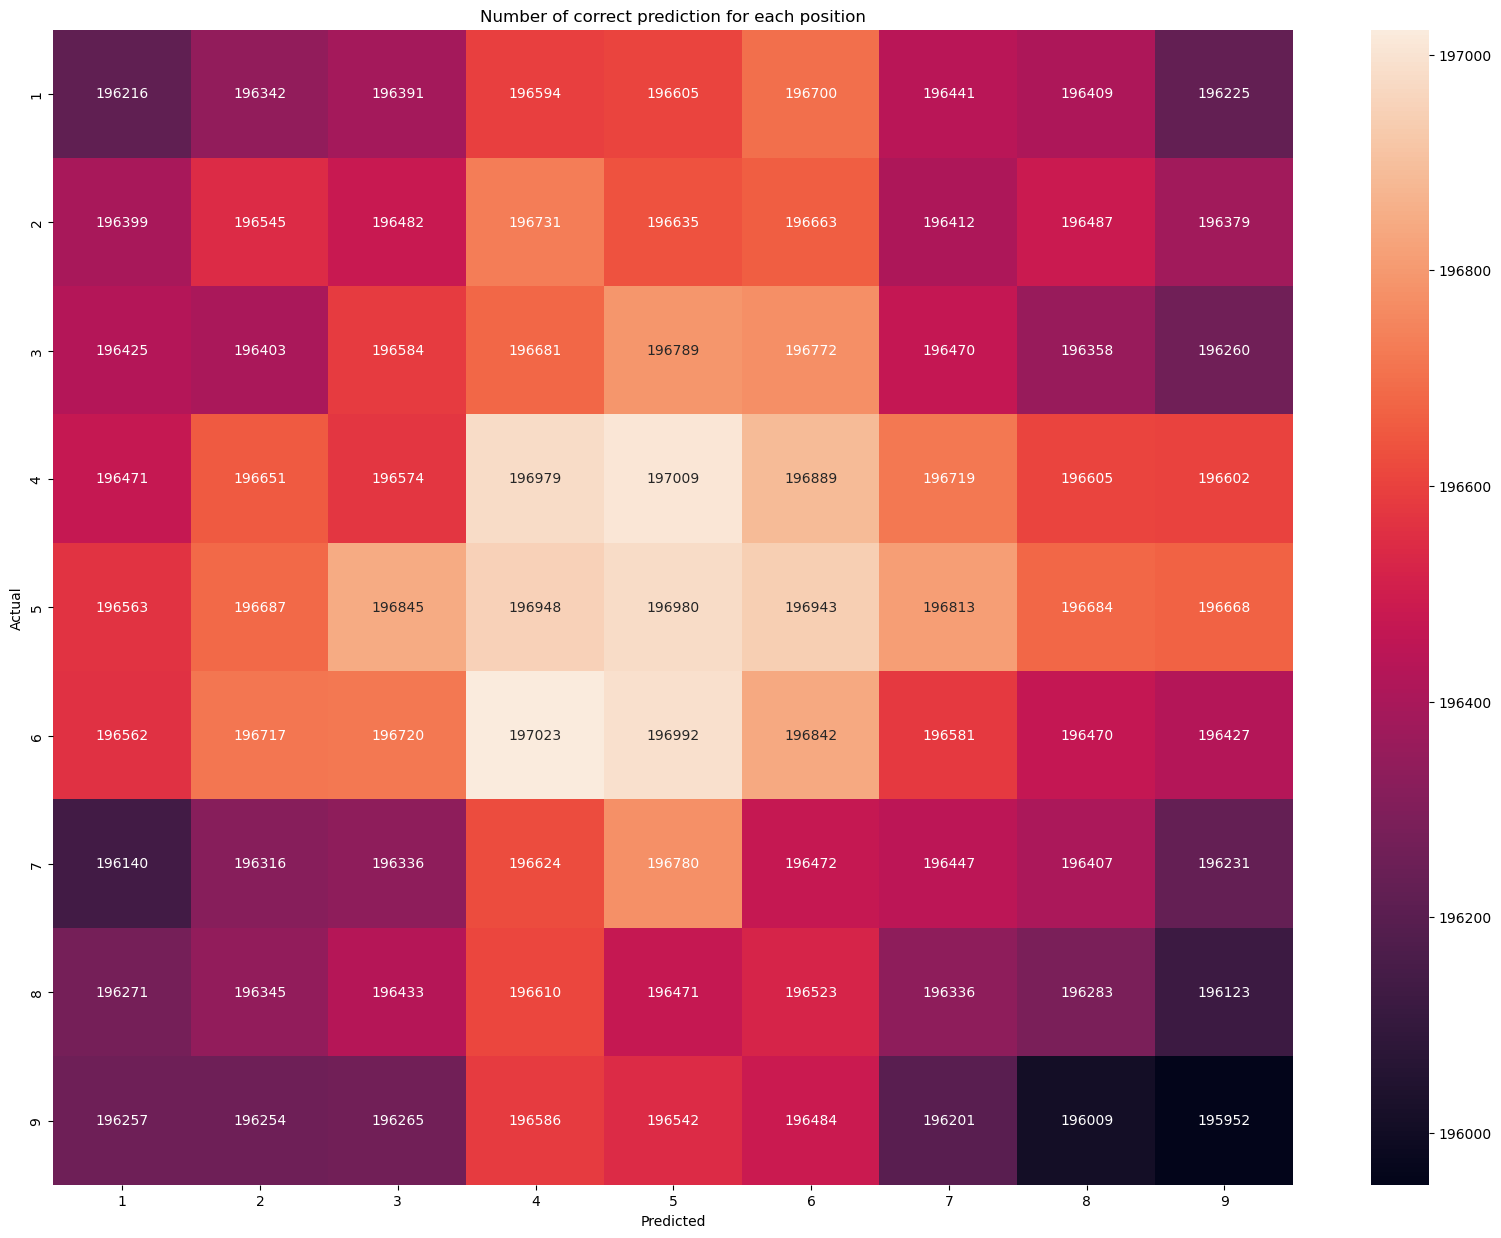

In [180]:
ticks = [1,2,3,4,5,6,7,8,9]

plt.figure(figsize=(20,15))
sns.heatmap(cga, annot=True, fmt='g',xticklabels = ticks, yticklabels = ticks)
plt.title('Number of correct prediction for each position')
plt.xlabel('Predicted')
plt.ylabel('Actual')

It looks like for each position, the model makes the correct prediction of about 196,500 out of 200,000. It looks pretty high, let's build a function to check the accuracy for each position. 

In [181]:
def count_grid_position_acc(cga):
    sum = y_test.shape[0]
    acc = np.zeros((9,9))
    for i in range(9):
        for j in range(9):
            acc[i][j] = round(cga[i][j] / sum, 4)
    return acc       

In [182]:
cga_acc = count_grid_position_acc(cga)

Text(220.72222222222223, 0.5, 'Actual')

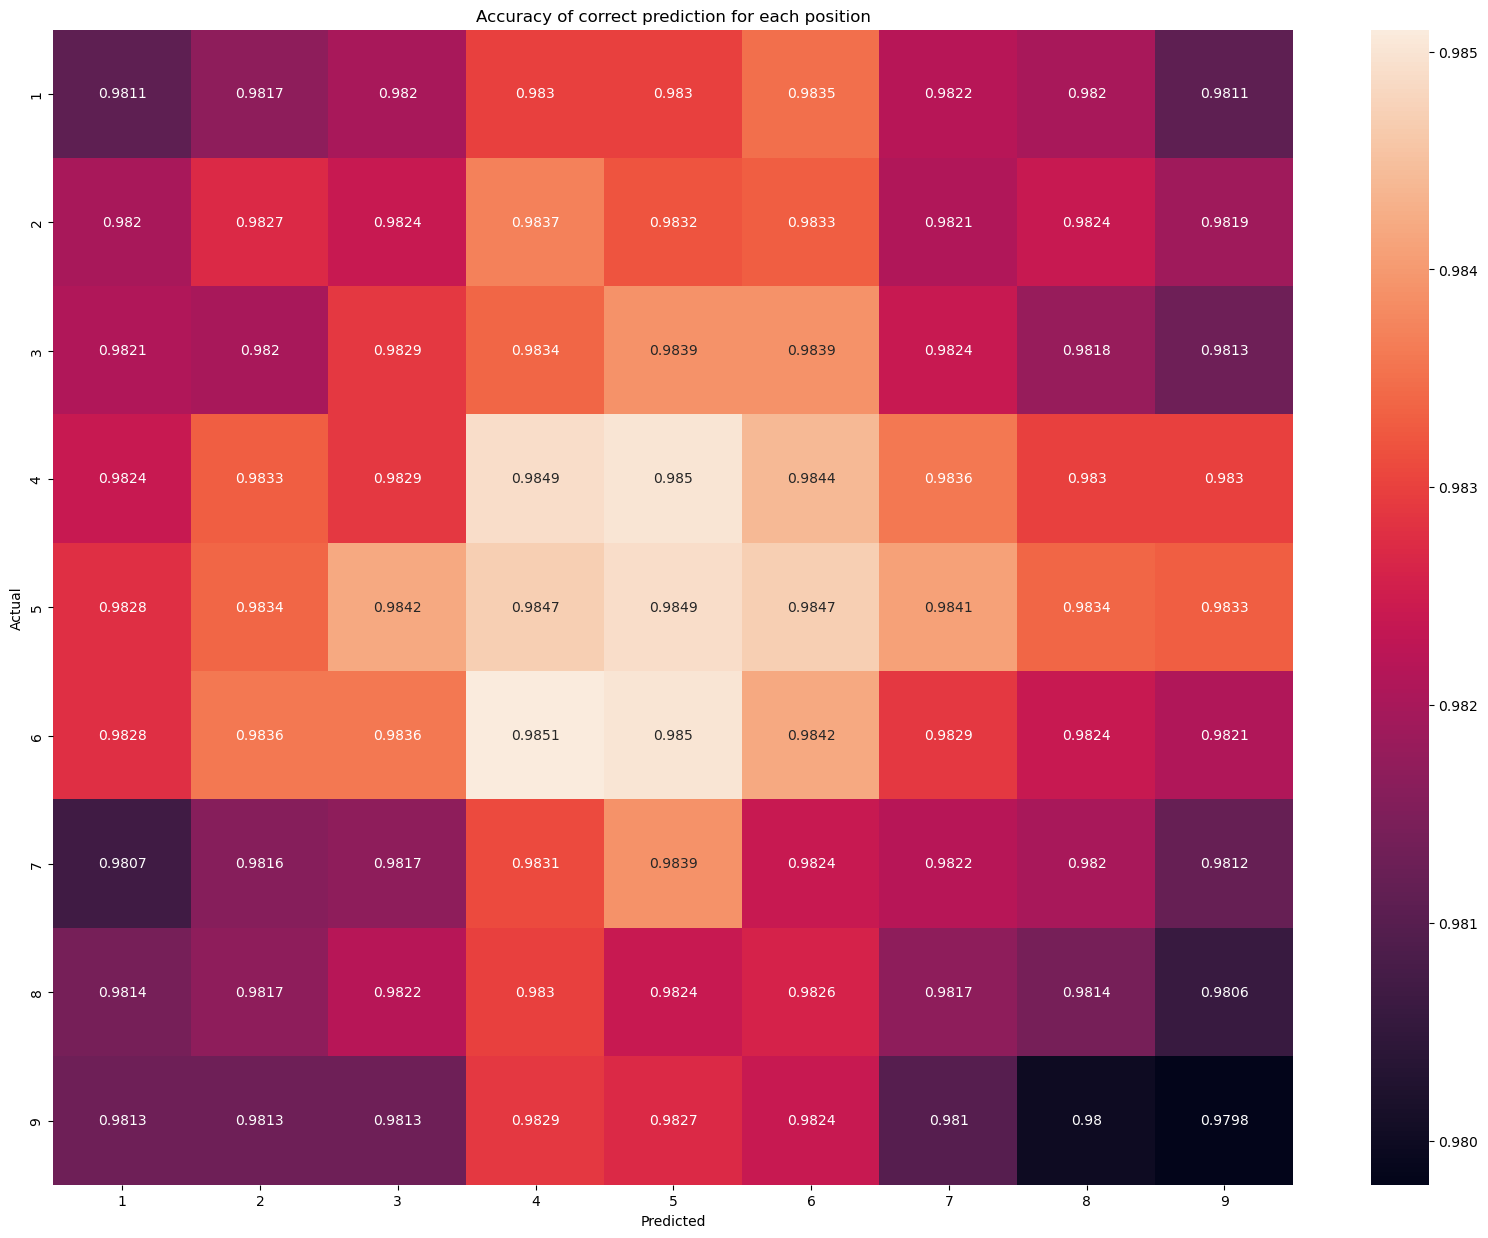

In [183]:
ticks = [1,2,3,4,5,6,7,8,9]

plt.figure(figsize=(20,15))
sns.heatmap(cga_acc, annot=True, fmt='g',xticklabels = ticks, yticklabels = ticks)
plt.title('Accuracy of correct prediction for each position')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Looks like all positions are around 98% correct. <br>

Let's build a confusion matrix function to evaluate the model. The **confusion matrix** is a summary of prediction results for a classification problem. We want to evaluate to check if the model can classify the digit 1 to 9 correctly. 

In [164]:
def confusion_matrix_func(actual, predicted):
    result = np.zeros((9,9), dtype=np.int)
    for i in range(y_real_11.shape[0]):
        for j in range(9):
            for k in range(9):
                if predicted[i][1][0][j][k] == actual[i][1][j][k]:
                    result[actual[i][1][j][k]-1][actual[i][1][j][k]-1] += 1
                else:
                    result[actual[i][1][j][k]-1][predicted[i][1][0][j][k]-1] += 1
    return result
        

In [165]:
cm = confusion_matrix_func(y_real_11, y_pred_11)

C:\Users\DSMLAzure\AppData\Local\Temp\2\ipykernel_4852\2344926541.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((9,9), dtype=np.int)


In [166]:
cm

array([[1767456,    4197,    3986,    4217,    4448,    4081,    3857,
           3983,    3775],
       [   3863, 1769048,    3762,    4067,    4135,    3932,    3871,
           3740,    3582],
       [   3741,    4121, 1768841,    4049,    4057,    3970,    3750,
           3817,    3654],
       [   3958,    4046,    3778, 1769192,    4181,    3814,    3814,
           3691,    3526],
       [   4029,    4329,    4013,    4305, 1767418,    4002,    4040,
           3995,    3869],
       [   4098,    4223,    3987,    4261,    4377, 1767346,    3985,
           4079,    3644],
       [   3870,    4097,    3868,    4080,    4371,    3898, 1768543,
           3767,    3506],
       [   3660,    3710,    3635,    3925,    3913,    3680,    3686,
        1770314,    3477],
       [   3555,    3777,    3502,    3788,    3854,    3675,    3525,
           3422, 1770902]])

Text(220.72222222222223, 0.5, 'Actual Label')

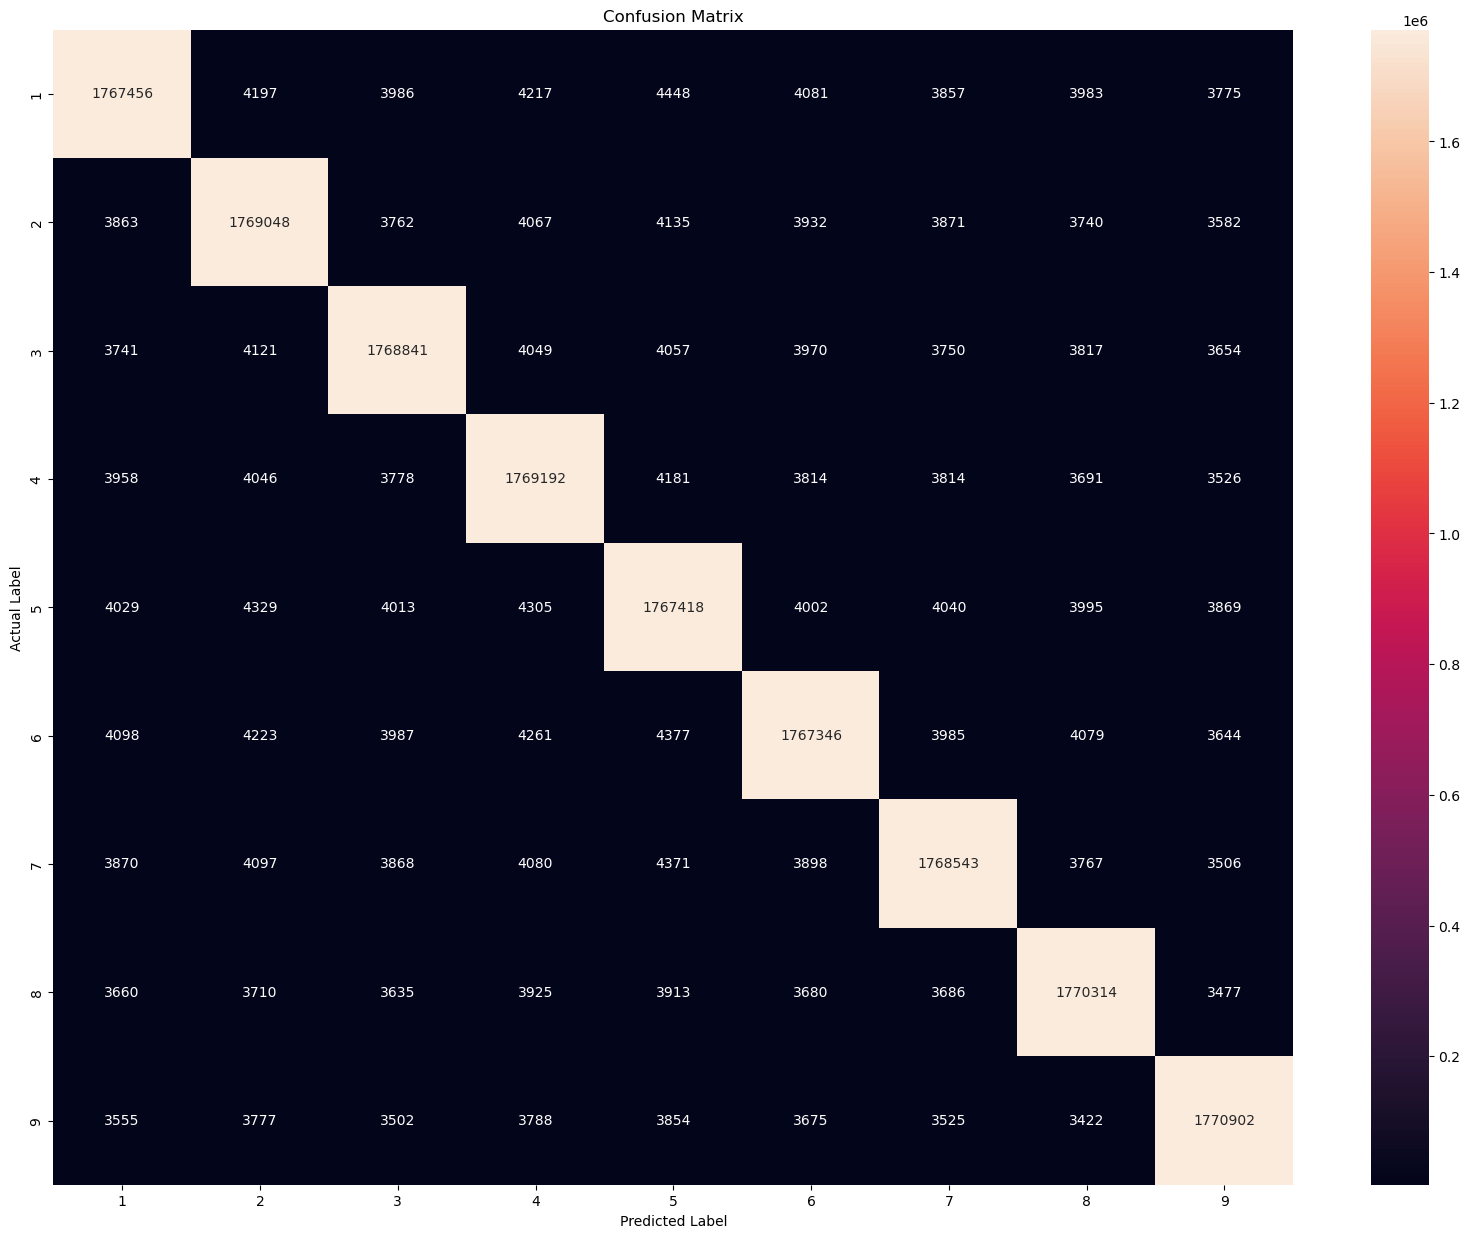

In [193]:
plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True, fmt='d',xticklabels = ticks, yticklabels = ticks)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

The y-axis is the actual label and the x-axis is the predicted label. For example, the first number 1,767,456 indicates that the model predicts the number is 1 when it is actually one. This is also called a true positive. However, the second of the first row indicates the model predicts 4197 times that the digit is 2 but it is actually 1. This is also called False Negative. The first number of the second row indicates the model predicts 3863 times that the digit is 1 but it is actually 2. 

Let's normalize the confusion matrix to have a better idea of how it performs.

In [190]:
norm_cm = np.round(cm/cm.astype(np.float).sum(axis=1), 4)

C:\Users\DSMLAzure\AppData\Local\Temp\2\ipykernel_4852\2432549872.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  norm_cm = np.round(cm/cm.astype(np.float).sum(axis=1), 4)


Text(220.72222222222223, 0.5, 'Actual Label')

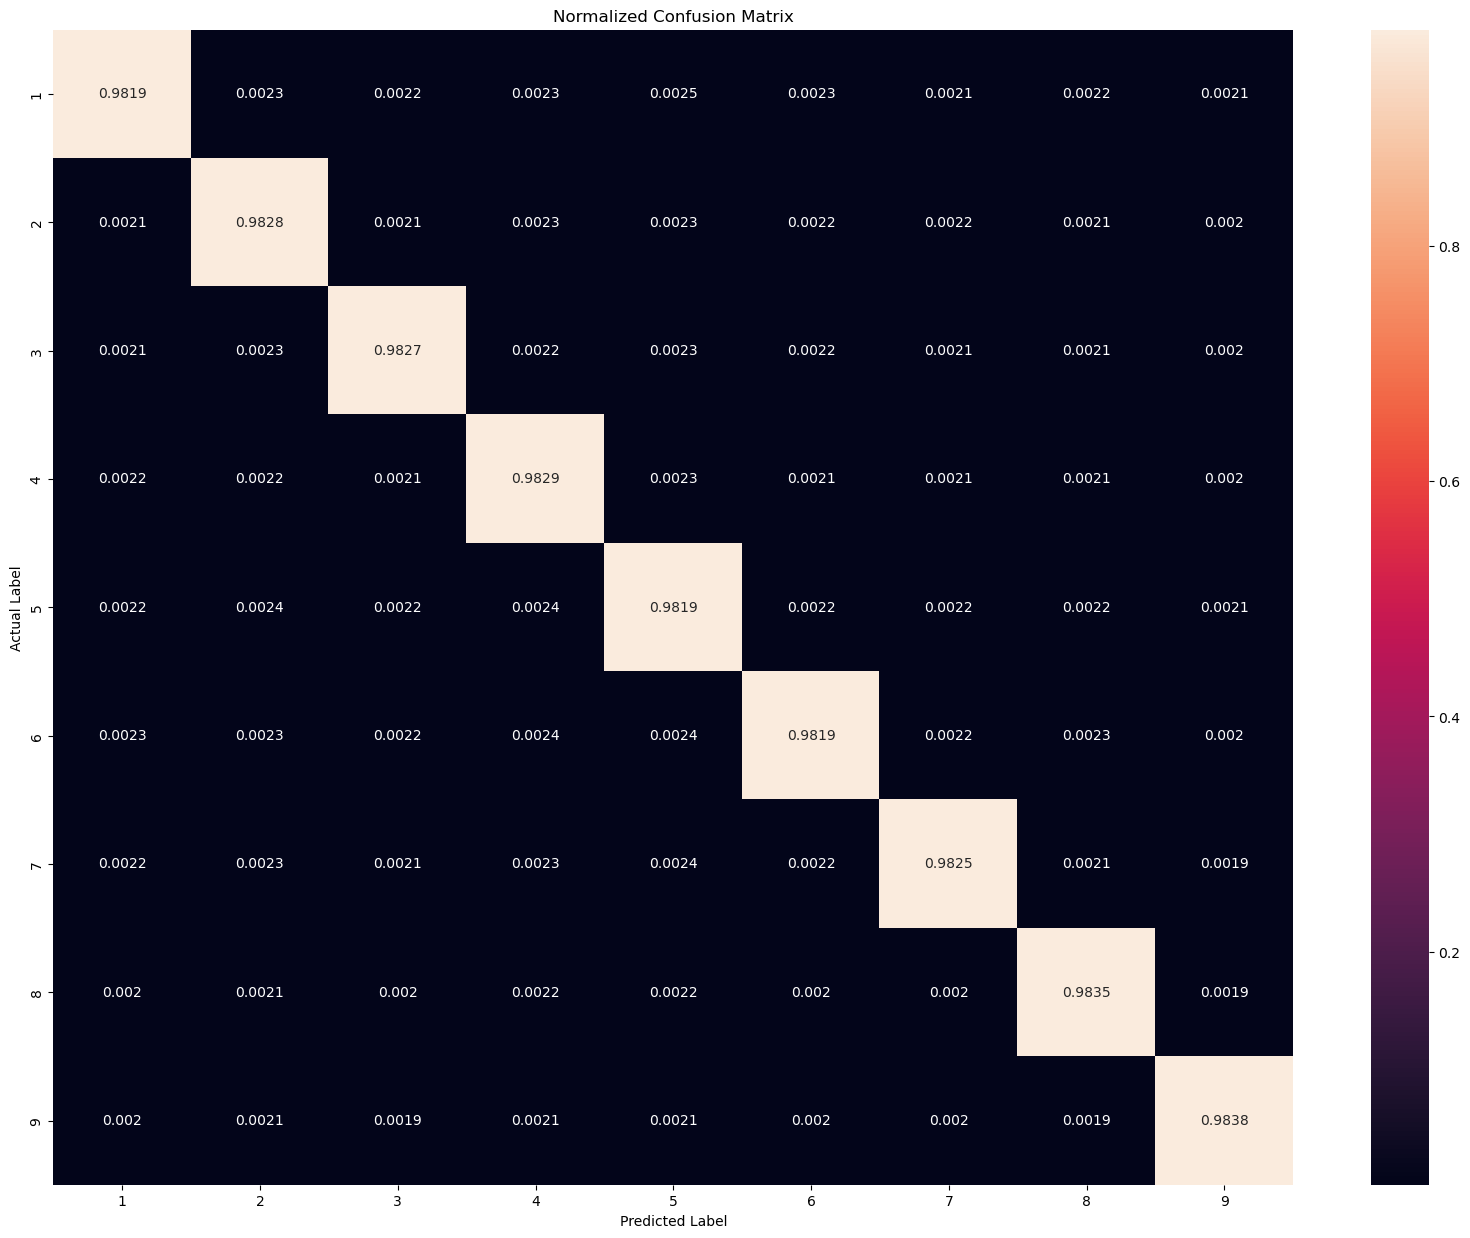

In [191]:
plt.figure(figsize=(20,15))
sns.heatmap(norm_cm, annot=True, fmt='g',xticklabels = ticks, yticklabels = ticks)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

We can see there are around 98% of times the model predicts the digit is 1 when it is actually 1. 

In [201]:
df = pd.DataFrame(cm, index= ['1','2','3','4','5','6','7','8','9'], columns=['1','2','3','4','5','6','7','8','9'], dtype=int)
df.da.export_metrics()

,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996091,0.996083,0.996192,0.996080,0.995931,0.996068,0.996174,0.996285,0.996412,0.996146
f1,0.982403,0.982382,0.982861,0.982370,0.981693,0.982296,0.982778,0.983287,0.983852,0.982658
false_discovery_rate,0.017113,0.018040,0.016968,0.018143,0.018512,0.017266,0.016969,0.016934,0.016130,0.017342
false_negative_rate,0.018080,0.017196,0.017311,0.017116,0.018101,0.018141,0.017476,0.016492,0.016166,0.017342
false_positive_rate,0.002137,0.002257,0.002120,0.002270,0.002315,0.002156,0.002120,0.002118,0.002016,0.002168
negative_predictive_value,0.997740,0.997850,0.997836,0.997860,0.997737,0.997733,0.997816,0.997938,0.997979,0.997832
positive_predictive_value,0.982887,0.981960,0.983032,0.981857,0.981488,0.982734,0.983031,0.983066,0.983870,0.982658
precision,0.982887,0.981960,0.983032,0.981857,0.981488,0.982734,0.983031,0.983066,0.983870,0.982658
recall,0.981920,0.982804,0.982689,0.982884,0.981899,0.981859,0.982524,0.983508,0.983834,0.982658
sensitivity,0.981920,0.982804,0.982689,0.982884,0.981899,0.981859,0.982524,0.983508,0.983834,0.982658


From the report above, we can see the average f1 score is 98% for this model. The F1 score encodes precision and recall. The score is high indicating the model is well performed. 

### Conclusion

In this study, we have experimented with different neural networks such as CNN, RNN, and LSTM. The above study has shown the possibility of solving sudoku games using Deep learning methods. The neural networks have better performance with zero-centred normalized data. The data have been divided by 9 and subtracted by 0.5 to achieve zero mean-centred data. The convolution neural networks (CNN) is good at extracting features. An increase in the number of epochs, number of layers, and number of neurons per layer can help improve the accuracy of the model. Dropout layer or maxpooling can help prevent overfitting. Adding strides of 3 x 3 could be useful but require large training hours and computing power. 

From the above experiments with different neural network models, the CNN model is able to solve a sudoku game but may still make some mistakes in the game. The cnn_model_11 is the optimal choice for model selection. The model includes 9 convolution layers with 512 kernels. A dropout layer of 0.1 was added to the model to prevent overfitting. After 5 epochs, the model generates a 95% of training accuracy. For each grid on the sudoku game board, the model is able to predict 98% correctly on unseen data. The model is also doing a great job to predict the digits 1 to 9 correctly. Overall, a CNN model with a certain number of convolution layers and a large number of neurons should be able to predict a classical sudoku game. 

[Return to top](#Final-Project:-Applied-Deep-Learning)